## PROBLEM STATEMENT:
### Android is one of the most used mobile operating systems worldwide. Even if it includes security mechanisms, its open source availability may be a bane to it and the latest news about malicious activities and Android´s vulnerabilities point to the importance of continuing the development of methods and frameworks to improve its security. 

### Our job is to create analytical models based on data allow for the discovery of insights that can help to predict malicious activities.

### The underlying dataset containes various features explaining the cause and effect of the malware. They are:
#### 1.tcp_packets: 
TCP packets, count the number of packets
TCP sent and received during communication.
#### 2.dist_port_tcp:
Different TCP packets, is the total number
of packets that have ports other than those
exposed in TCP.
#### 3.external_ips:
External IP, represents the number of addresses
External IPs to which the application communicated.
#### 4.vulume_bytes:
Byte volume, is the number of bytes that
is sent from the application to the sites
external.
#### 5.udp_packets:
UDP packets, total number of packets
UDP transferred in communication.
#### 6.tcp_urg_packet:
TCP packet with urg flag , used to notify the receiver to 
process the urgent packets before processing all other 
packets.
#### 7.source_app_packets:
Source application packages, is the number
of packets sent from the application to a
Remote server.
#### 8.remote_app_packets:
Remote application packages, number of
packets received from sources outside the
application.
#### 9.source_app_bytes:
Bytes of the source application, This is the
volume (in bytes) of communication between the
application and server.
#### 10.remote_app_bytes:
Bytes from the remote application, this is the
volume (in bytes) of data from server
up to the emulator.
#### 11.dns_query_times:
DNS queries, number of DNS queries.
#### 12.Type:
Tells how dangerous the malware is and its effect on android. Benign if the malware is not that harmful and is focussed on a particular portion of the device. Malicious if it spreads the malware to the entire system and is harmful to the entire device.
	


In [1]:
# IMPORT NECESSARY MODULES

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats import weightstats as stests
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### CREATE AND READ DATASET FOR ANALYSIS:

In [2]:
# READ THE ACTUAL DATASET

# df = pd.read_csv("android_traffic.txt",sep=";")

# DROP UNNECESSARY COLUMNS

# del df["duracion"]
# del df["avg_local_pkt_rate"]
# del df["avg_remote_pkt_rate"]

# CREATE MISSING DATA AND STORE IT INTO A CSV

# for i,j in [(np.random.randint(0,7845),np.random.randint(0,14)) for i in range(0,4000)]:
#     df.iloc[i,j] = np.nan
# df.to_csv("android_malware.csv")

# df.head()

In [3]:
# READ THE DATASET FOR THE ANALYSIS

df = pd.read_csv("android_malware.csv")
del df['Unnamed: 0']
del df['source_app_packets.1'] #duplicate column
df.head()

name  tcp_packets  dist_port_tcp  external_ips  vulume_bytes  \
0  AntiVirus         36.0            6.0           3.0        3911.0   
1  AntiVirus        117.0            0.0           9.0       23514.0   
2  AntiVirus        196.0            0.0           6.0       24151.0   
3  AntiVirus          6.0            0.0           1.0         889.0   
4  AntiVirus          6.0            0.0           1.0         882.0   

   udp_packets  tcp_urg_packet  source_app_packets  remote_app_packets  \
0          0.0             0.0                39.0                33.0   
1          0.0             0.0               128.0               107.0   
2          0.0             0.0               205.0               214.0   
3          0.0             0.0                 7.0                 6.0   
4          0.0             0.0                 7.0                 6.0   

   source_app_bytes  remote_app_bytes  dns_query_times    type  
0            5100.0            4140.0              3.0  benign  
1           26248.0               NaN             11.0  benign  
2          163887.0           24867.0              9.0  benign  
3             819.0             975.0              1.0  benign  
4             819.0             968.0              1.0  benign

### DATA CLEANING:

In [4]:
total_data = df.shape[0]*df.shape[1]
print("Number of rows in the dataframe = {}".format(df.shape[0]))
print("Number of columns in the dataframe = {}".format(df.shape[1]))

Number of rows in the dataframe = 7845
Number of columns in the dataframe = 13


In [5]:
# Look for null data
total_na = df.isnull().sum().sum()
print("Total number of missing data = {}".format(total_na))
print("Percentage of missing data = {}%".format((total_na/total_data)*100))

Total number of missing data = 3671
Percentage of missing data = 3.5995489532774427%


In [6]:
# Initial Summary of Dataframe
df.describe()

tcp_packets  dist_port_tcp  external_ips  vulume_bytes  udp_packets  \
count   7554.000000    7554.000000   7552.000000  7.541000e+03  7561.000000   
mean     147.445856       7.870267      2.752516  1.667338e+04     0.057135   
std      784.412943      52.574149      2.937220  8.361037e+04     1.418198   
min        0.000000       0.000000      0.000000  0.000000e+00     0.000000   
25%        6.000000       0.000000      1.000000  8.880000e+02     0.000000   
50%       25.000000       0.000000      2.000000  3.504000e+03     0.000000   
75%       93.000000       0.000000      4.000000  1.220100e+04     0.000000   
max    37143.000000    2167.000000     43.000000  4.226790e+06    65.000000   

       tcp_urg_packet  source_app_packets  remote_app_packets  \
count     7549.000000         7554.000000         7585.000000   
mean         0.000265          152.045274          195.837179   
std          0.016276          781.170324         1082.685785   
min          0.000000            1.000000            0.000000   
25%          0.000000            7.000000            7.000000   
50%          0.000000           30.000000           24.000000   
75%          0.000000           97.000000           92.000000   
max          1.000000        37150.000000        45928.000000   

       source_app_bytes  remote_app_bytes  dns_query_times  
count      7.566000e+03      7.587000e+03      7568.000000  
mean       2.042132e+05      1.708408e+04         4.925344  
std        1.415039e+06      8.364346e+04        19.221428  
min        0.000000e+00      6.900000e+01         0.000000  
25%        9.340000e+02      1.046000e+03         1.000000  
50%        4.083000e+03      3.809000e+03         3.000000  
75%        2.623625e+04      1.257050e+04         5.000000  
max        6.823516e+07      4.227323e+06       913.000000

### 1. Missing data

In [7]:
# Column wise missing data
print("Column-wise missing data:\n",df.isnull().sum())

Column-wise missing data:
 name                  251
tcp_packets           291
dist_port_tcp         291
external_ips          293
vulume_bytes          304
udp_packets           284
tcp_urg_packet        296
source_app_packets    291
remote_app_packets    260
source_app_bytes      279
remote_app_bytes      258
dns_query_times       277
type                  296
dtype: int64


In [8]:
# Categorize into discrete and continious columns

for cols in df.columns:
    print("Column: ",cols,'\n\n\nUnique Data: ',df[cols].unique(),'\n\n\nNumber of Unique data: ',len(df[cols].unique()),'\n','-'*100)
    
# Data Columns with continious data
continious_cols = ['tcp_packets','dist_port_tcp','vulume_bytes','source_app_bytes','source_app_packets','remote_app_bytes','remote_app_packets']

# Data Columns with discrete data
discrete_cols = ['name','external_ips','udp_packets','tcp_urg_packet','dns_query_times','type']

Column:  name 


Unique Data:  ['AntiVirus' nan 'Browser' 'chess' 'Communication' 'DailyLife' 'Education'
 'Finance' 'HealthAndFitness' 'Input' 'MediaAndVideo' 'NewsAndMagazines'
 'Personalization' 'Photography' 'Productivity' 'Reading' 'Shopping'
 'Social' 'Sport' 'Tools' 'TravelAndLocal' 'Ackposts' 'Acnetdoor' 'Adrd'
 'Adsms' 'Aks' 'Anudow' 'BaseBridge' 'Boxer' 'DroidDream' 'DroidKungFu'
 'DroidRooter' 'DroidSheep' 'EICAR-Test-File' 'EWalls'
 'ExploitLinuxLotoor' 'FaceNiff' 'FakeDoc' 'FakeFlash' 'FakeInstaller'
 'Fakelogo' 'Fakengry' 'FakeRun' 'FakeTimer' 'FinSpy' 'Fjcon' 'FoCobers'
 'Fujacks' 'Gamex' 'Gapev' 'Gappusin' 'GGtrack' 'GinMaster' 'Glodream'
 'Gmuse' 'Gonca' 'Hamob' 'Hispo' 'Iconosys' 'Imlog' 'JSExploit-DynSrc'
 'JSmsHider' 'Kmin' 'Ksapp' 'Loozfon' 'Luckycat' 'Maxit' 'MMarketPay'
 'Mobilespy' 'Mobsquz' 'Moghava' 'Nandrobox' 'Nickspy' 'NickyRCP'
 'Nyleaker' 'Opfake' 'Pirater' 'Pirates' 'PJApps' 'Placms' 'Plankton'
 'Raden' 'RootSmart' 'SafeKidZone' 'Saiva' 'Sakezon' 'Sdisp'

In [9]:
print("Number of columns with continious data: ",len(continious_cols))
print("Number of columns with discrete data: ",len(discrete_cols))

Number of columns with continious data:  7
Number of columns with discrete data:  6


In [10]:
# Impute median for continious data columns
# NOTE: Columns are not imputed with mean as it might contain outliers

for cols in continious_cols:
    df[cols] = df[cols].fillna(df[cols].median())
    
# Impute mode for discrte data columns

for cols in discrete_cols:
    df[cols] = df[cols].fillna(df[cols].mode()[0])

In [11]:
df

name  tcp_packets  dist_port_tcp  external_ips  vulume_bytes  \
0     AntiVirus         36.0            6.0           3.0        3911.0   
1     AntiVirus        117.0            0.0           9.0       23514.0   
2     AntiVirus        196.0            0.0           6.0       24151.0   
3     AntiVirus          6.0            0.0           1.0         889.0   
4     AntiVirus          6.0            0.0           1.0         882.0   
...         ...          ...            ...           ...           ...   
7840      Zsone          0.0            0.0           0.0           0.0   
7841      Zsone          4.0            4.0           1.0         296.0   
7842      Zsone          0.0            0.0           0.0           0.0   
7843    Reading          0.0            0.0           0.0           0.0   
7844      Zsone          0.0            0.0           0.0           0.0   

      udp_packets  tcp_urg_packet  source_app_packets  remote_app_packets  \
0             0.0             0.0                39.0                33.0   
1             0.0             0.0               128.0               107.0   
2             0.0             0.0               205.0               214.0   
3             0.0             0.0                 7.0                 6.0   
4             0.0             0.0                 7.0                 6.0   
...           ...             ...                 ...                 ...   
7840          0.0             0.0                 2.0                 2.0   
7841          0.0             0.0                 5.0                 1.0   
7842          0.0             0.0                 2.0                 2.0   
7843          0.0             0.0                 2.0                 2.0   
7844          0.0             0.0                 2.0                 2.0   

      source_app_bytes  remote_app_bytes  dns_query_times       type  
0               5100.0            4140.0              3.0     benign  
1              26248.0            3809.0             11.0     benign  
2             163887.0           24867.0              9.0     benign  
3                819.0             975.0              1.0     benign  
4                819.0             968.0              1.0     benign  
...                ...               ...              ...        ...  
7840             257.0             143.0              2.0  malicious  
7841              86.0             382.0              1.0  malicious  
7842             257.0             143.0              2.0  malicious  
7843            4083.0             143.0              2.0  malicious  
7844             257.0             143.0              2.0  malicious  

[7845 rows x 13 columns]

In [12]:
df.isnull().sum().sum()

0

### 2. Outliers:

In [13]:
def outlier(cols,minX,maxX):
    ax = sns.boxplot(df[cols])
    ax.set_xlim(minX,maxX)
    Q3 = df[cols].quantile(.75)
    Q1 = df[cols].quantile(.25)
    IQR = Q3 - Q1
    Median = df[cols].median()
    print("Q1 Value:",Q1)
    print("Median Value:",df[cols].median())
    print("Q3 Value:",Q3)
    print("Upper whisker limit:",(Q3 + 1.5*IQR))
    print("Lower whisker limit:",(Q1 - 1.5*IQR))
    outliers = df[cols][(df[cols]>(Q3 + 1.5*IQR)) | (df[cols]<(Q1 - 1.5*IQR))]
    status = (df[cols]>(Q3 + 1.5*IQR)) | (df[cols]<(Q1 - 1.5*IQR))
#     print(status.value_counts())
    df[cols][status] = np.nan
#     print(df[cols].isnull().sum())
    df[cols] = df[cols].fillna(df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR)))][cols].median())
    print("Percentage of outliers:",(len(outliers)/len(df[cols]))*100)
    plt.figure()
    # for that column mean and sigma will be calculated and the pdf will be calculated for all column and plotted that is your smoothened distribution
    sns.distplot(df[cols],kde=True)
    plt.figure()
    return df

Q1 Value: 6.0
Median Value: 25.0
Q3 Value: 88.0
Upper whisker limit: 211.0
Lower whisker limit: -117.0
Percentage of outliers: 10.924155513065648


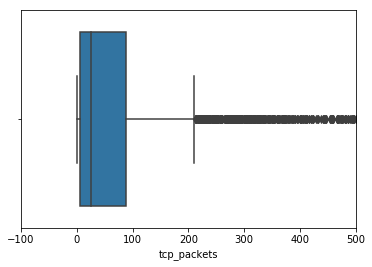

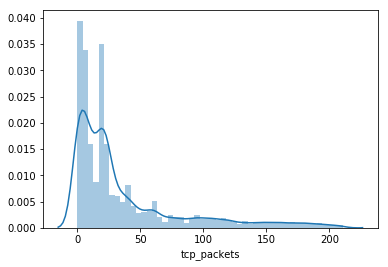

<Figure size 432x288 with 0 Axes>

In [14]:
df = outlier('tcp_packets',-100,500)

(-5, 100)

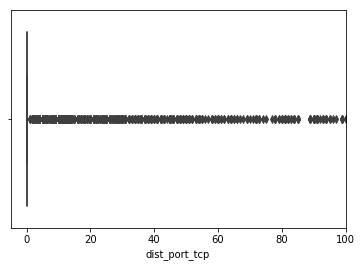

In [15]:
ax = sns.boxplot(df['dist_port_tcp'])
ax.set_xlim(-5,100)
# df = outlier('dist_port_tcp',-50,500)

In [16]:
(df['dist_port_tcp'].value_counts()*100/sum(df['dist_port_tcp'].value_counts()))

0.0       80.369662
12.0       3.377948
6.0        2.664117
8.0        0.764818
11.0       0.752071
            ...    
122.0      0.012747
1603.0     0.012747
203.0      0.012747
313.0      0.012747
359.0      0.012747
Name: dist_port_tcp, Length: 168, dtype: float64

#### NOTE: As 80% as the column data is 0, it can be concluded that data is too sparse to be fit for normal analysis

Q1 Value: 7.0
Median Value: 25.0
Q3 Value: 49.0
Upper whisker limit: 112.0
Lower whisker limit: -56.0
Percentage of outliers: 10.312300828553218


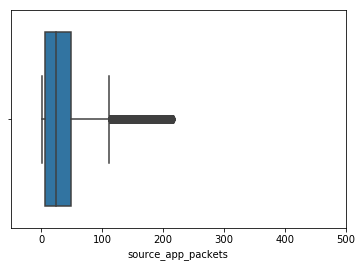

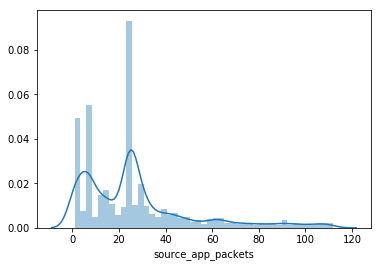

<Figure size 432x288 with 0 Axes>

In [23]:
df = outlier('source_app_packets',-50,500)

Q1 Value: 7.0
Median Value: 24.0
Q3 Value: 90.0
Upper whisker limit: 214.5
Lower whisker limit: -117.5
Percentage of outliers: 13.052899936265137


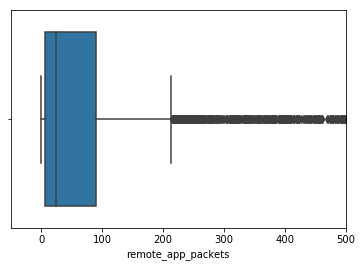

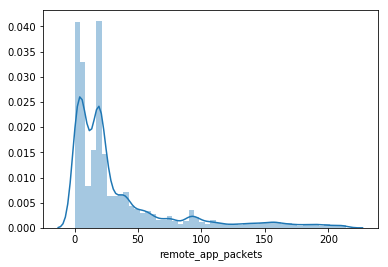

<Figure size 432x288 with 0 Axes>

In [18]:
df = outlier('remote_app_packets',-50,500)

Q1 Value: 890.0
Median Value: 3504.0
Q3 Value: 11567.0
Upper whisker limit: 27582.5
Lower whisker limit: -15125.5
Percentage of outliers: 10.2868068833652


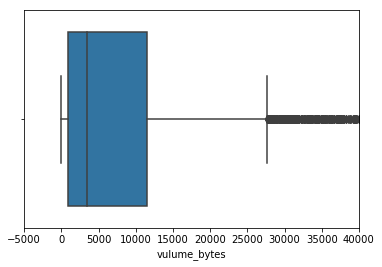

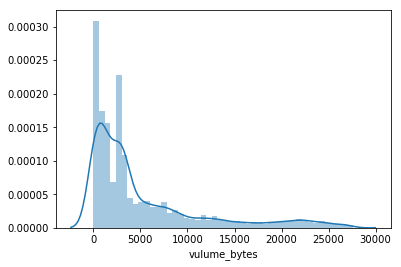

<Figure size 432x288 with 0 Axes>

In [19]:
df = outlier('vulume_bytes',-5000,40000)

Q1 Value: 1001.0
Median Value: 4083.0
Q3 Value: 23714.0
Upper whisker limit: 57783.5
Lower whisker limit: -33068.5
Percentage of outliers: 19.88527724665392


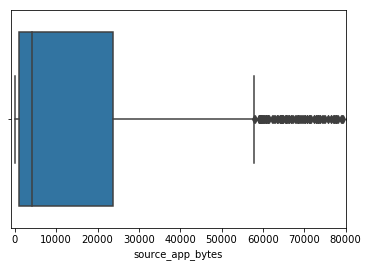

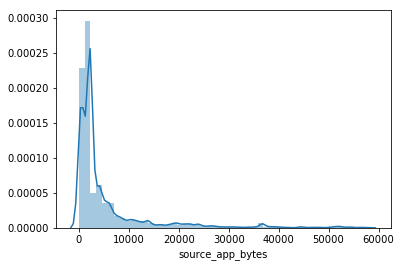

<Figure size 432x288 with 0 Axes>

In [20]:
df = outlier('source_app_bytes',-1000,80000)

Q1 Value: 1062.0
Median Value: 3809.0
Q3 Value: 12038.0
Upper whisker limit: 28502.0
Lower whisker limit: -15402.0
Percentage of outliers: 10.146590184831103


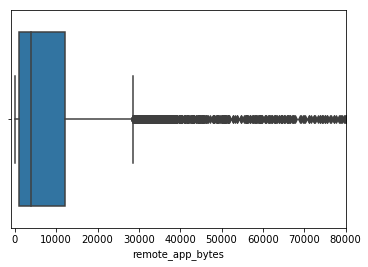

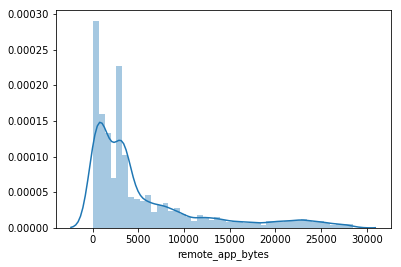

<Figure size 432x288 with 0 Axes>

In [21]:
df = outlier('remote_app_bytes',-1000,80000)

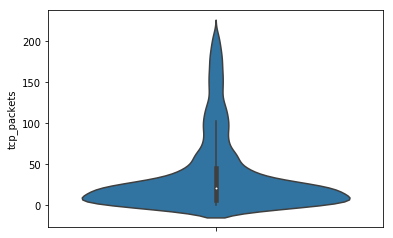

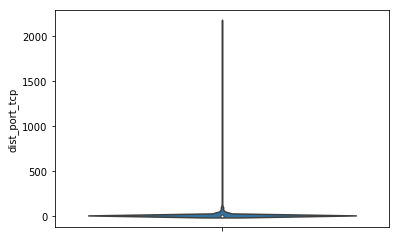

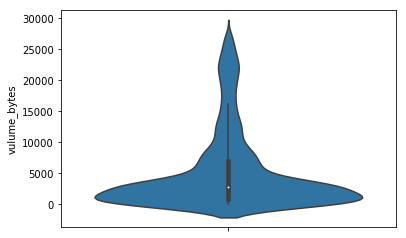

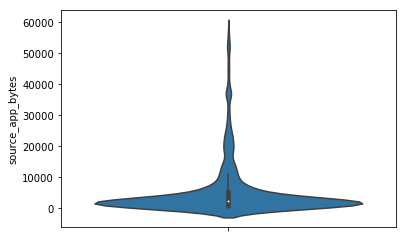

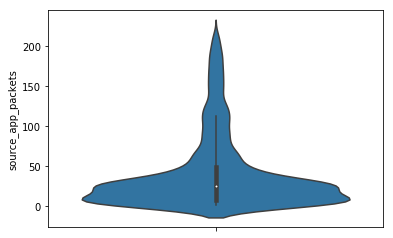

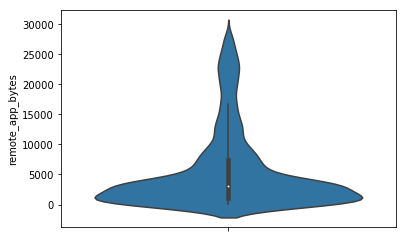

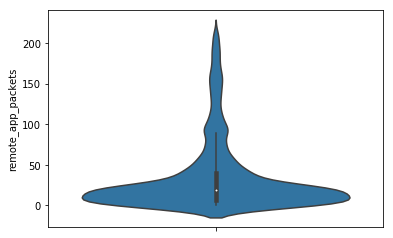

<Figure size 432x288 with 0 Axes>

In [22]:
for cols in continious_cols:
    sns.violinplot(y=cols,data=df)
    plt.figure()

#### INFERENCE: The continious data is not symmetric, but positively skewed. There is no data point which is less then 0. Meaning all the values are either 0 or a number greater than 0.

# Categorical data:

In [24]:
def plot_bar(cols):
    plt.figure()
    plt.rcParams["figure.figsize"] = 25,7
    if(cols!="name"):
        df[cols].value_counts().plot(kind="bar")
        plt.xlabel(cols)
        plt.ylabel("frequency")
        plt.title("Frequency of "+cols)
        df[cols].value_counts()
        print(df[cols].value_counts())
    else:
        plt.figure()
        df[cols].value_counts().sort_values(ascending=False)[0:40].plot(kind="bar")
        plt.xlabel(cols)
        plt.ylabel("frequency")
        plt.title("Frequency of "+cols+" (Top 40 categories)")
        df[cols].value_counts()
        print(df[cols].value_counts().sort_values(ascending=False)[0:40])

In [25]:
discrete_cols

['name',
 'external_ips',
 'udp_packets',
 'tcp_urg_packet',
 'dns_query_times',
 'type']

Reading               995
Plankton              471
DroidKungFu           413
AntiVirus             387
NewsAndMagazines      349
Finance               349
HealthAndFitness      301
MediaAndVideo         292
Communication         291
GinMaster             291
Photography           284
Opfake                280
BaseBridge            265
Education             256
Productivity          240
DailyLife             223
FakeInstaller         209
Personalization       144
FakeRun               142
Input                 141
chess                 131
Kmin                  128
FakeDoc               118
Tools                  99
Social                 94
Shopping               83
Adrd                   77
Browser                62
Iconosys               58
TravelAndLocal         57
Gappusin               53
Glodream               52
ExploitLinuxLotoor     48
SendPay                46
Imlog                  39
Yzhc                   35
DroidDream             35
Sport                  19
Xsider      

<Figure size 432x288 with 0 Axes>

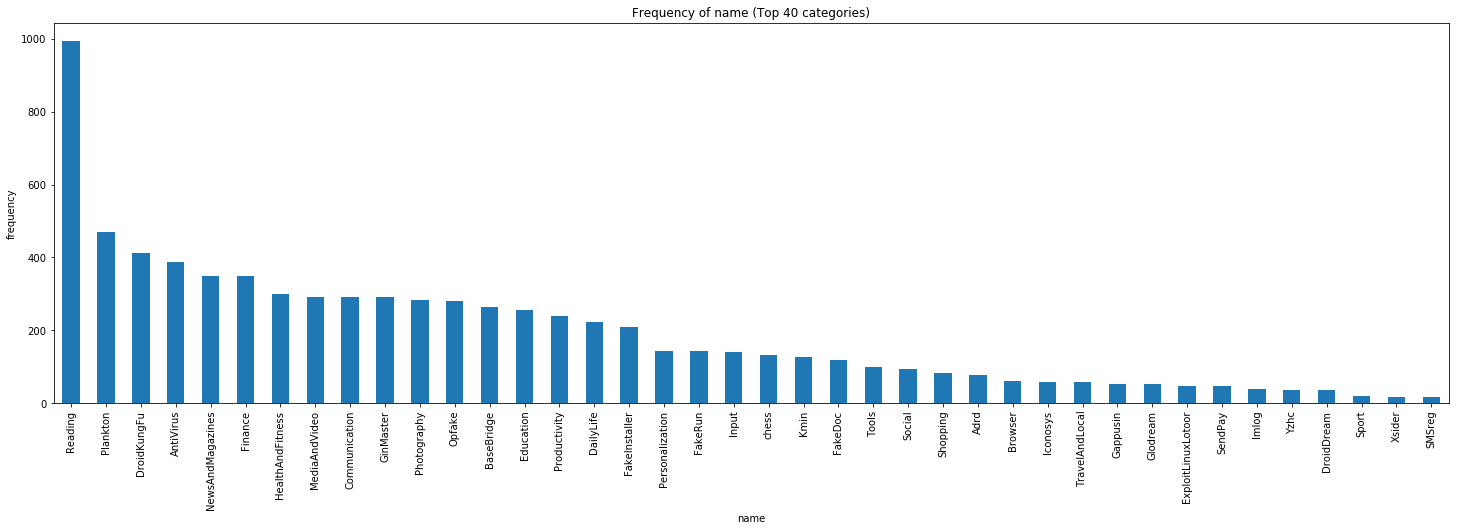

In [26]:
plot_bar("name")

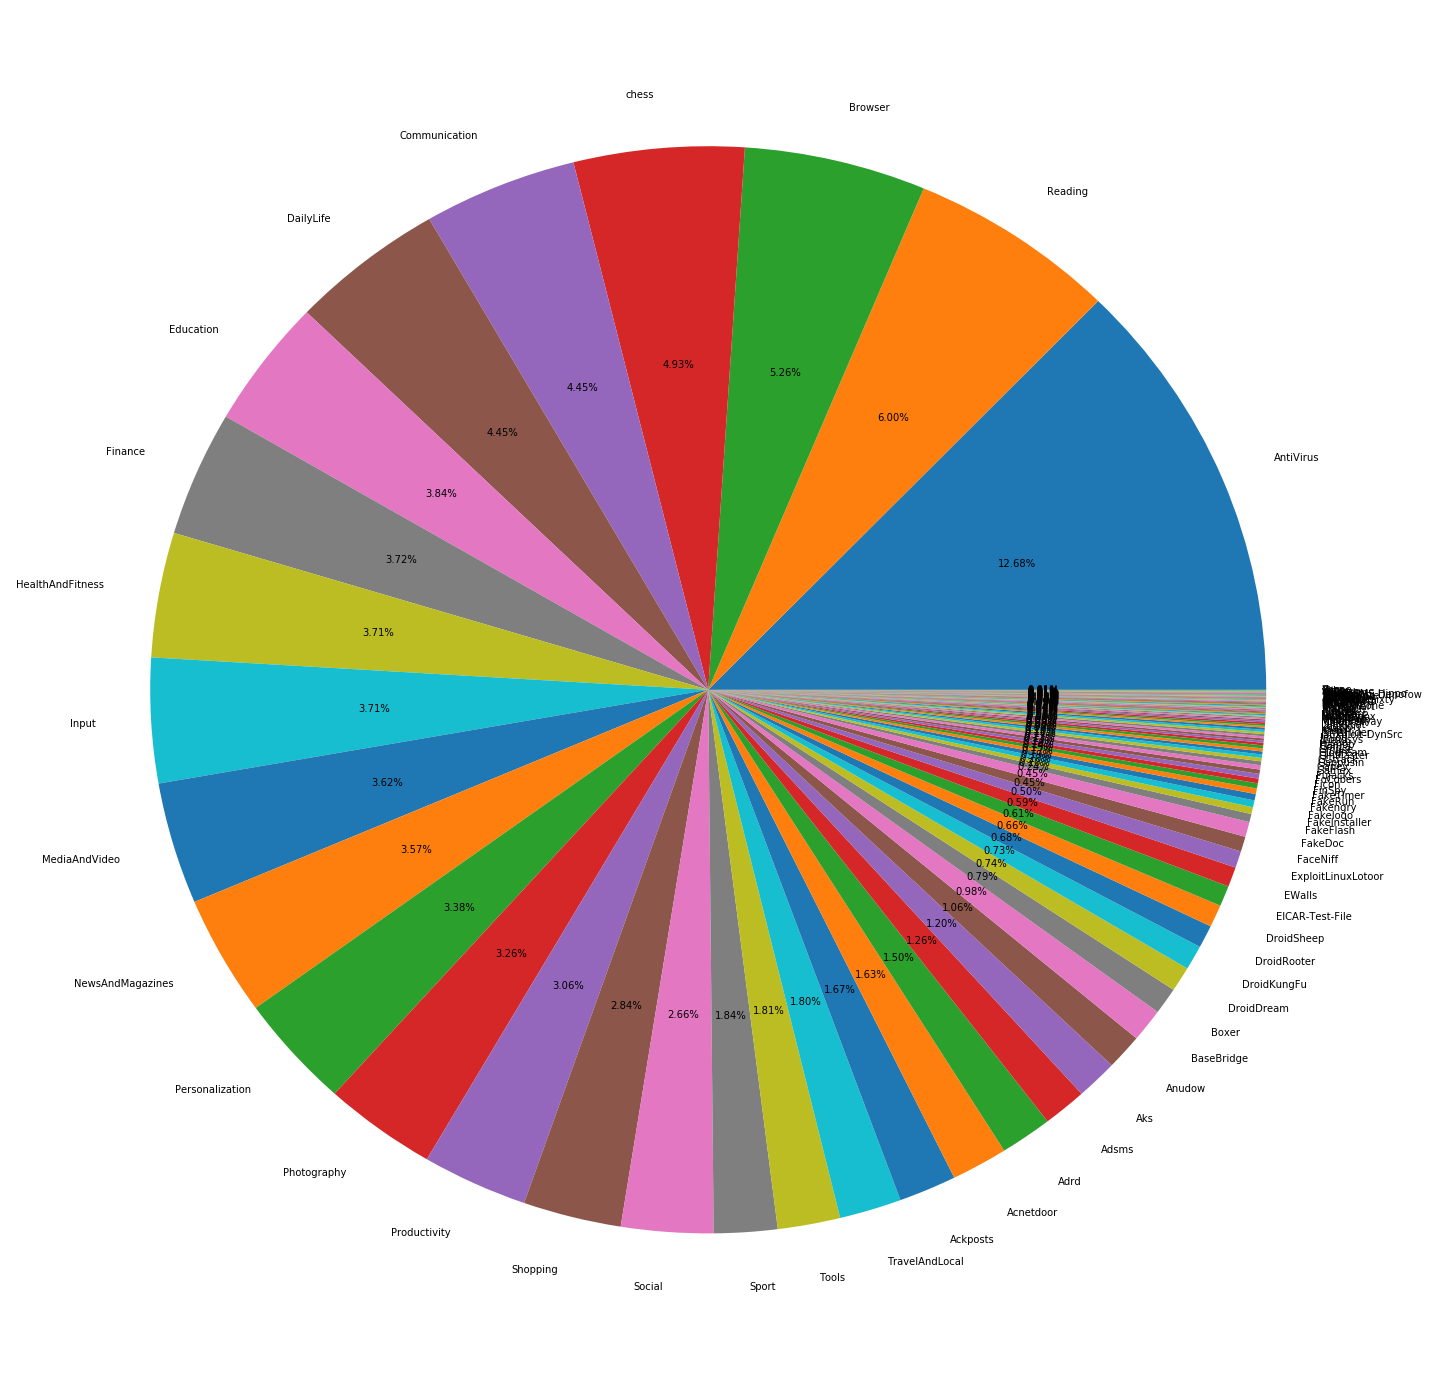

In [51]:
plt.rcParams["figure.figsize"] = 25,25
plt.pie(df['name'].value_counts(),labels=df['name'].unique(),autopct='%0.2f%%')
plt.show()
plt.rcParams["figure.figsize"] = 25,7

#### INFERENCE: Frequency of reading is maximum. Meaning utility apps which reads data like QR-reader seem to more prone to malwares. 
#### Plankton,DroidKungFu,AntiVirus,NewsAndMagazines,Finance,HealthAndFitness,MediaAndVideo,Communication,GinMaster,Photography,Opfake,BaseBridge,Education,Productivity,DilyLife,FakeInstaller,Personalization ,FakeRun,chess,Kmin,FakeDoc have high risk of causing malware as well.

1.0     2591
2.0     1345
0.0     1035
3.0      819
4.0      558
5.0      412
6.0      335
7.0      240
8.0      163
9.0      132
10.0      63
11.0      34
13.0      32
12.0      21
15.0      16
16.0      10
18.0       8
14.0       8
17.0       7
19.0       3
21.0       2
22.0       2
28.0       1
34.0       1
27.0       1
32.0       1
20.0       1
40.0       1
24.0       1
30.0       1
43.0       1
Name: external_ips, dtype: int64


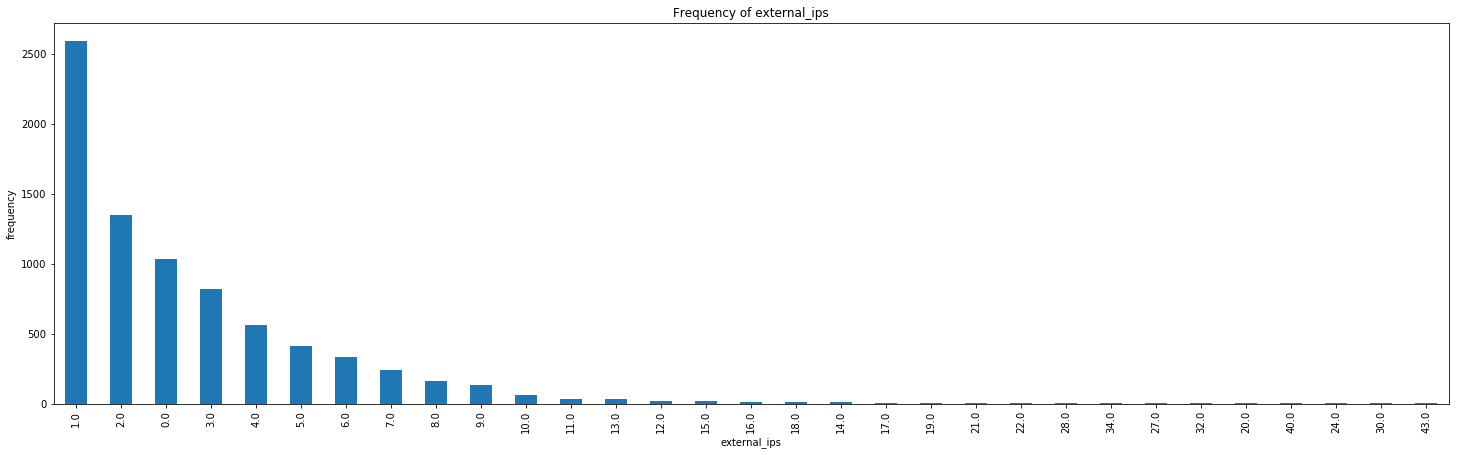

In [49]:
plot_bar("external_ips")

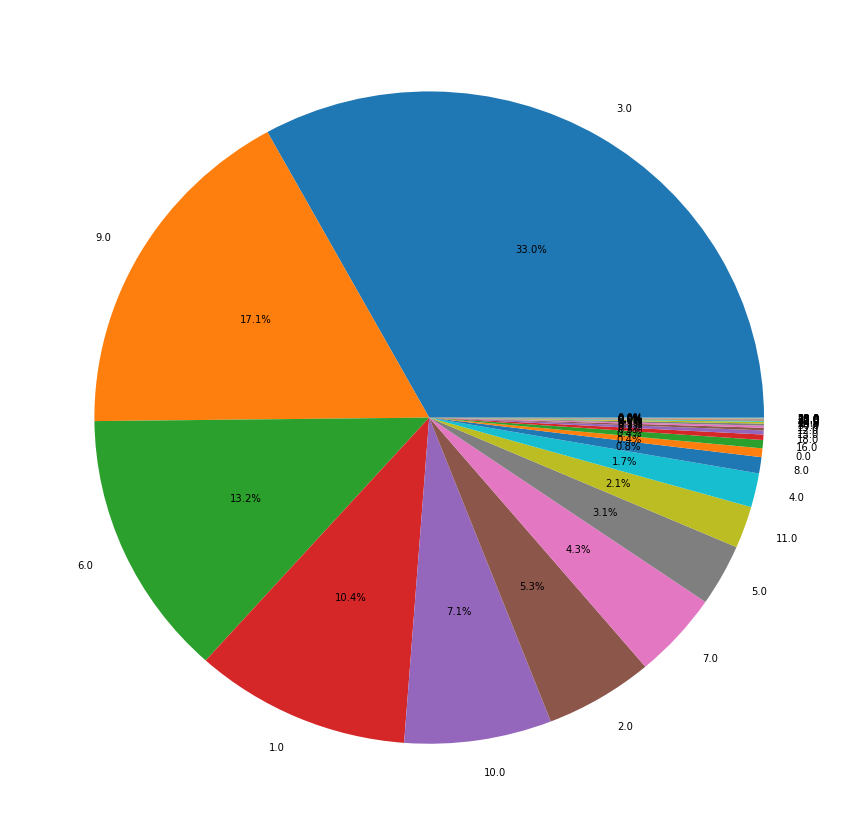

In [45]:
plt.rcParams["figure.figsize"] = 15,15
plt.pie(df['external_ips'].value_counts(),labels=df['external_ips'].unique(),autopct='%1.1f%%')
plt.show()
plt.rcParams["figure.figsize"] = 25,7

<b>INFERENCE: Frequency of external ips which signifies the number of addresses or External IPs to which the application communicated, decreases as its value increases.<br>Value 1 has highest frequency and it becomes the frequency approaches zero after 15 IPs. The count decreases as the device communicates to more and more external IPs</b>

0.0     7795
1.0       23
12.0       5
2.0        4
3.0        3
6.0        3
4.0        3
65.0       2
28.0       2
55.0       1
10.0       1
7.0        1
30.0       1
14.0       1
Name: udp_packets, dtype: int64


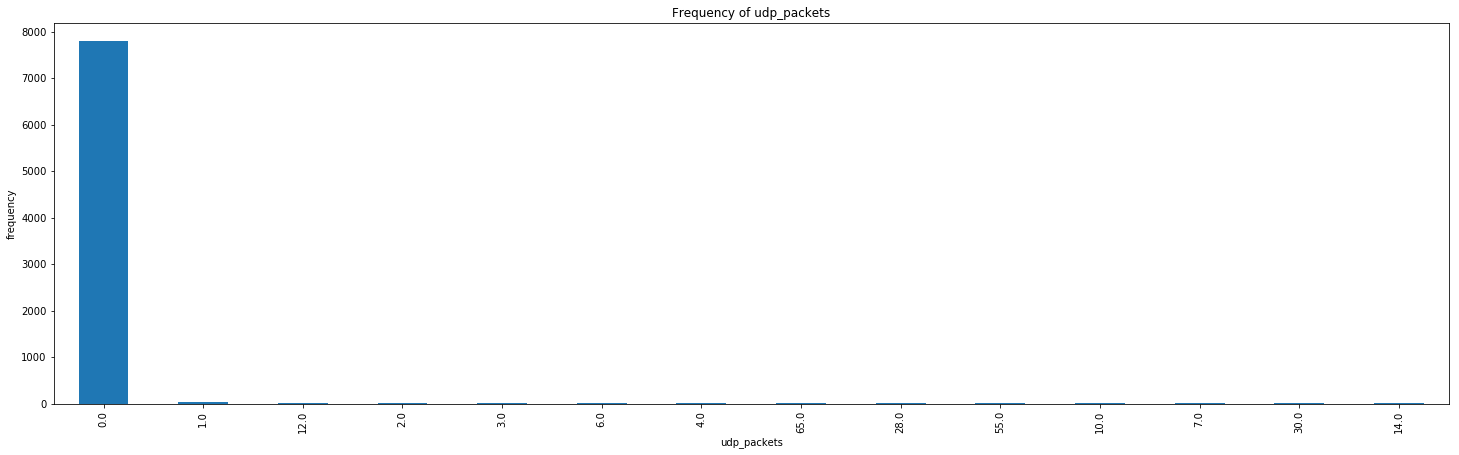

In [52]:
plot_bar('udp_packets')

<b>INFERENCE: The count of total number of packets UDP transferred in communication, is zero most of the time when the andriod tested for malware.<br> The count is almost zero for every other value with a few exceptions. </b>

0.0    7843
1.0       2
Name: tcp_urg_packet, dtype: int64


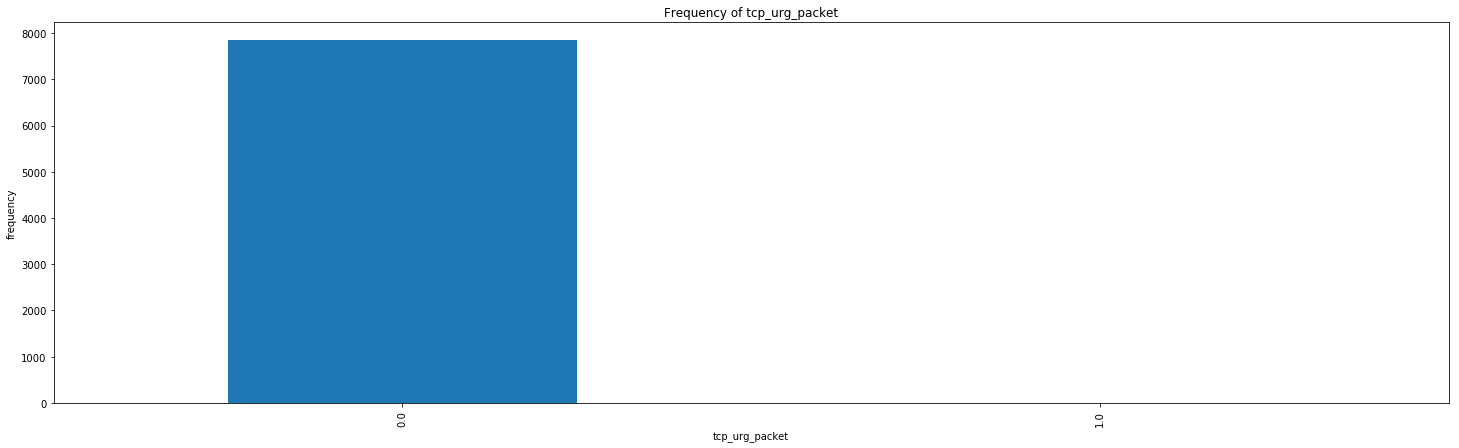

In [242]:
plot_bar('tcp_urg_packet')

<b> INFERENCE: It turns out there was no TCP packets that needs to be processed urgently or with the need of processing with higher priority when the sample of andriod malware was taken. (except the 2 cases where 1 each packet was sent to the server)</b> 

1.0      2507
2.0      1432
3.0      1027
4.0       604
5.0       468
         ... 
37.0        1
261.0       1
95.0        1
913.0       1
219.0       1
Name: dns_query_times, Length: 63, dtype: int64


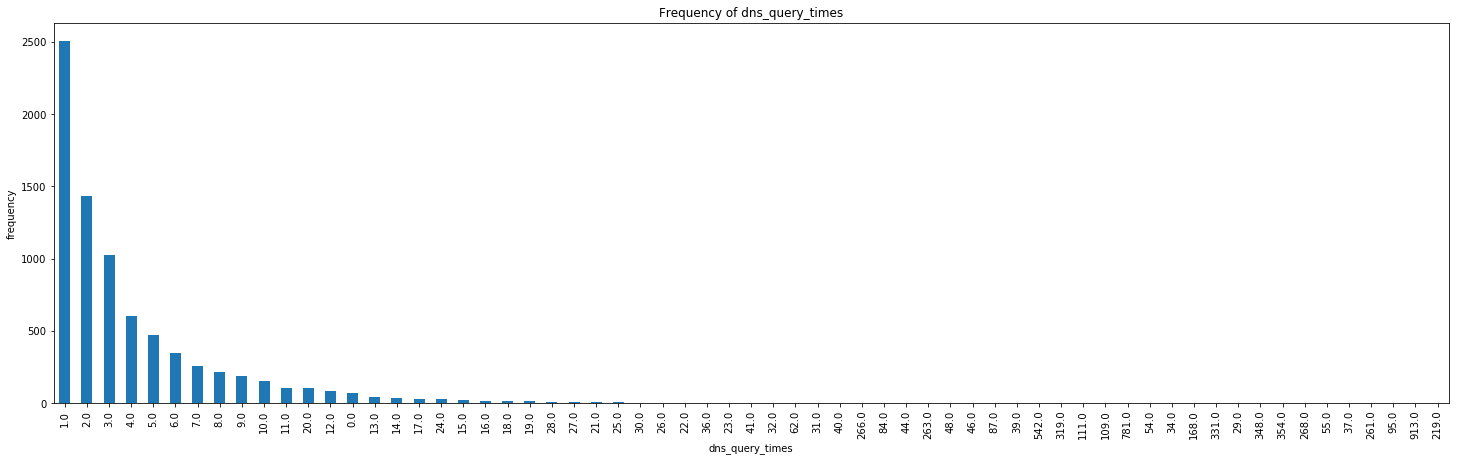

In [243]:
plot_bar('dns_query_times')

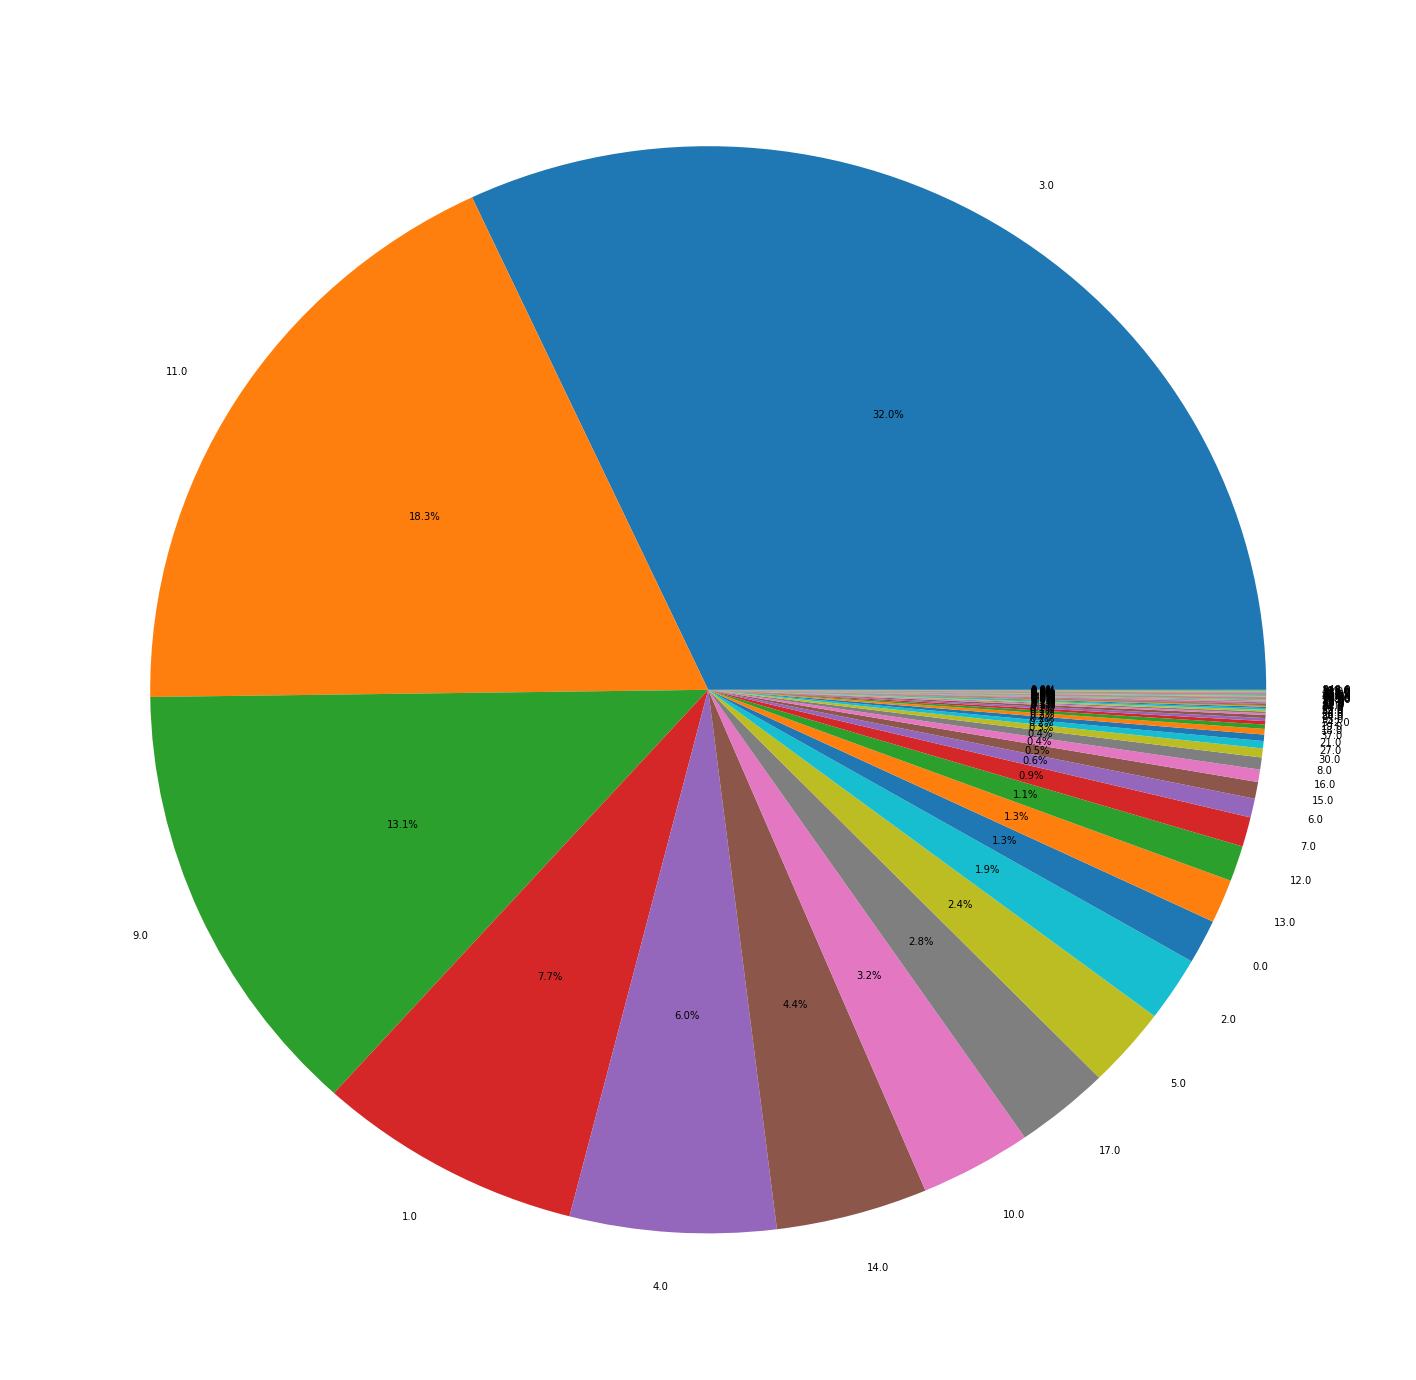

In [54]:
plt.figure(figsize=(25,25))
plt.pie(df['dns_query_times'].value_counts(),labels=df['dns_query_times'].unique(),autopct='%1.1f%%')
plt.show()

<b> INFERENCE: The number of DNS queries was always minimum most of the time. Most of the time it was between 0 to 10 dns queries.<br> Value 1 has maximum frequency and the count decreases as the number of queries increases.</b>

benign       4836
malicious    3009
Name: type, dtype: int64


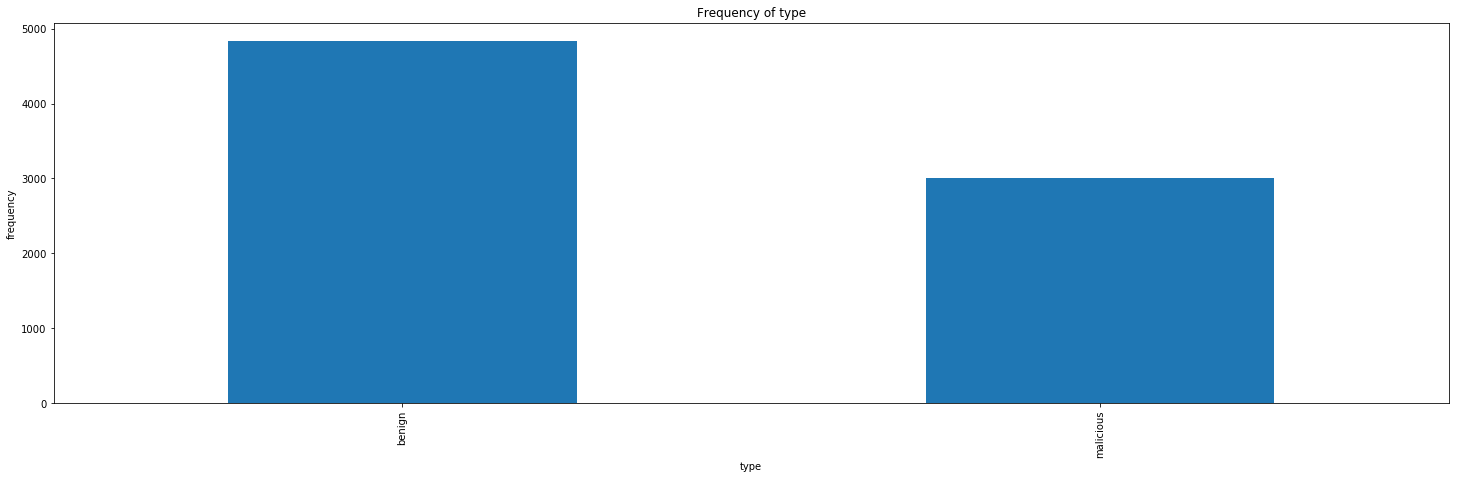

In [244]:
plot_bar('type')

<b> INFERENCE: The sample has more benign type malwares than malicious malwares.</b>

## Bivariate Analysis:

In [36]:
def bivariate(col1,col2):
    plt.figure()
    sns.scatterplot(x=col1,y=col2,data=df,color='g',legend='full')
    plt.title("Variation of {} w.r.t {}".format(col1,col2))
    plt.figure()
    plt.subplot(1,2,1) 
    plt.scatter(df[col1][df['type']=='benign'],df[col2][df['type']=='benign'])
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title("Variation of {} w.r.t {} when type=benign".format(col1,col2))
    plt.subplot(1,2,2) 
    plt.scatter(df[col1][df['type']=='malicious'],df[col2][df['type']=='malicious'])
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title("Variation of {} w.r.t {} when type=malicious".format(col1,col2))
    

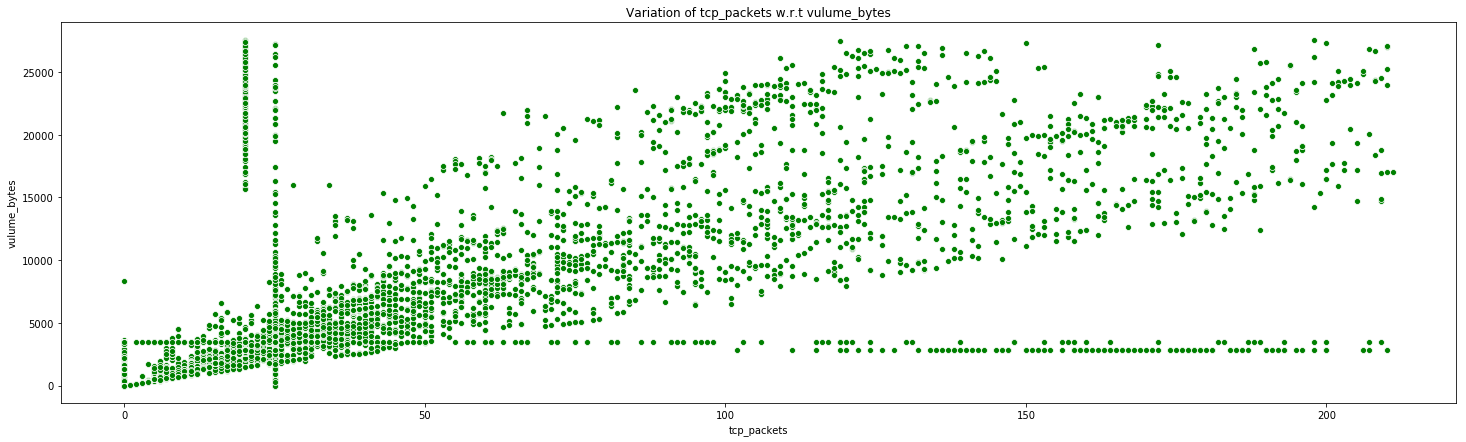

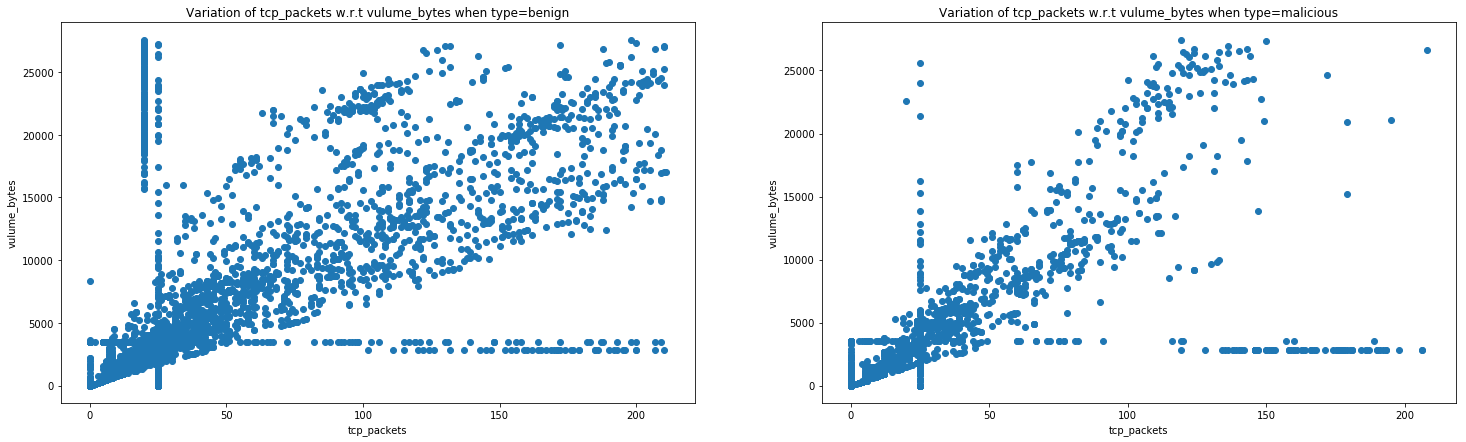

In [37]:
bivariate('tcp_packets','vulume_bytes')

#### INFERENCE: The overall data shows linear relation when the value of both axises is small(until (x,y) = (50,7500) approximately) and they scatter more and more when the magnitude increases.
#### It is noticeable that some data points(For example, when tcp_packets = 25 or vulume_bytes = 4000), the feature is completely independent with its counterpart i.e. the for some values of x, it is same irrespective of the values of y or vise-versa.
#### The datapoints for only with malicious malware data should more linearity property and all the points mentioned above than benign type data. Benign data points is more scattered.

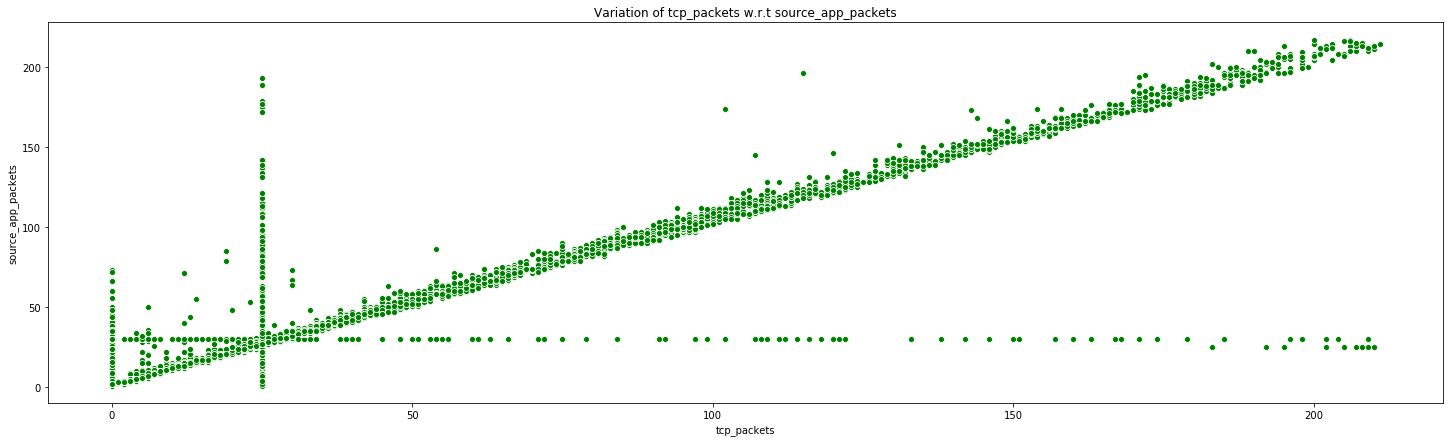

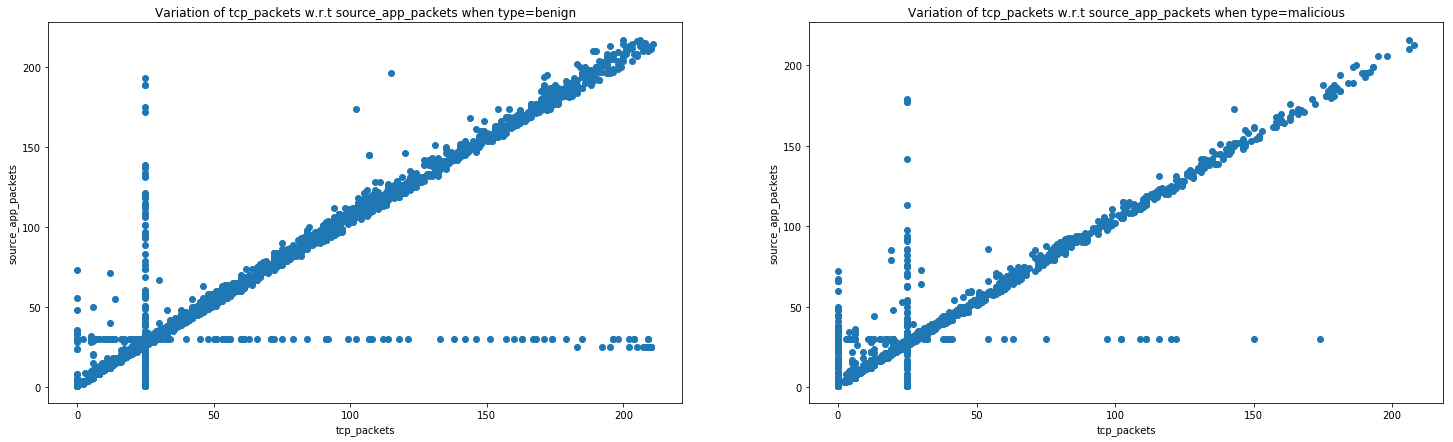

In [131]:
bivariate('tcp_packets','source_app_packets')

#### INFERENCE: We can see that number of tcp packets recieved during communication and the number of packets communicating from source to a remote application causing a malware is extensively linear. However, it is noticeable that for some values of x, it is same irrespective of the values of y or vise-versa.
#### Some data points with a smaller domain of x and y seem to be scattered, although the linear relationship increases as the value of x and y increases.

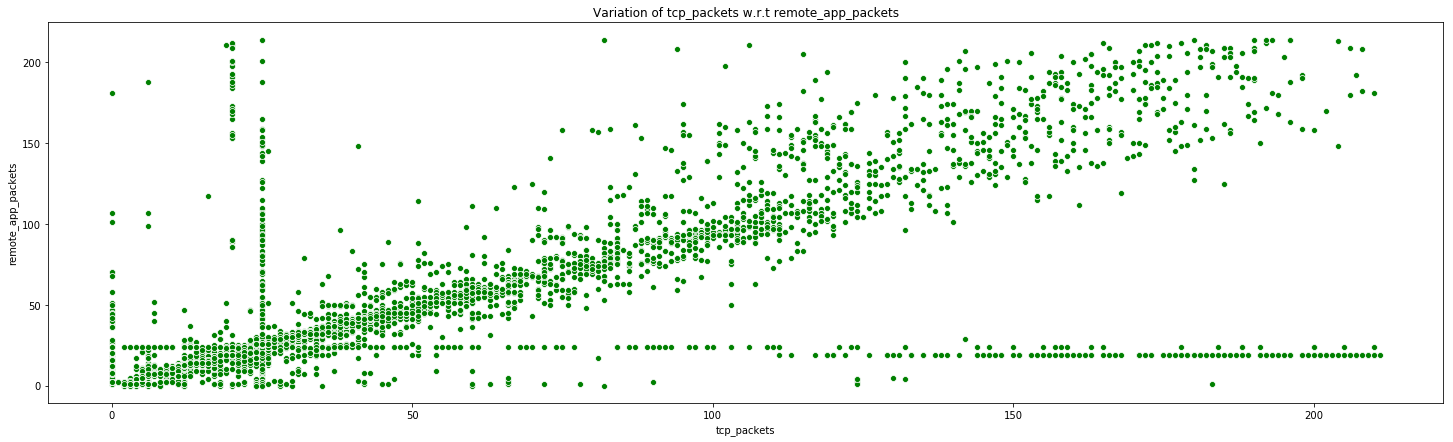

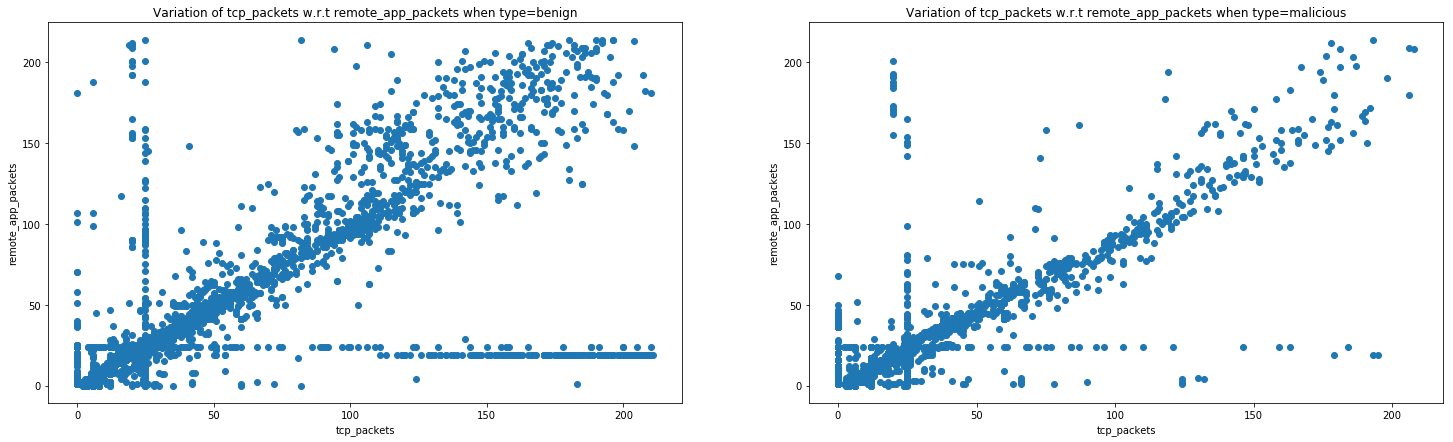

In [132]:
bivariate('tcp_packets','remote_app_packets')

#### INFERENCE: Like the analysed relationships until now, for smaller values of x and y, number of tcp packets and packets from remote application to the device there seems to be a linear relationship. Also, they seem to scatter as the magnitude increases. Some points are independent to y or x vaues.
#### When comapared to benign malwares, datapoints belonging to malicious seem to follow more order and have more linear relationship w.r.t x and y values.

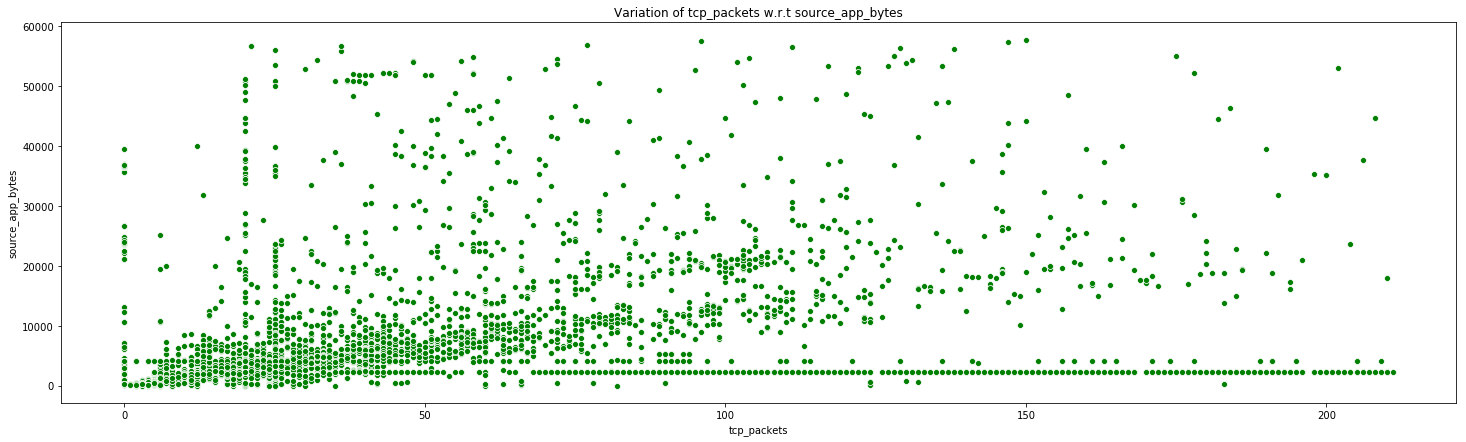

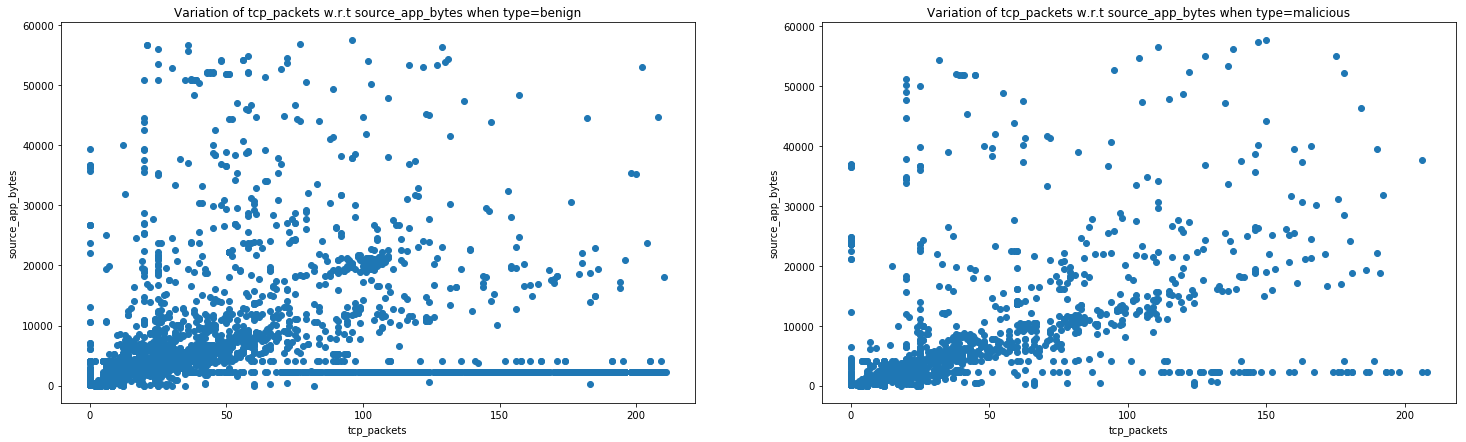

In [133]:
bivariate('tcp_packets','source_app_bytes')

#### INFERENCE: When compared with tcp_packets and other features discussed above, there isn't much linearity between tcp_packets and number of bytes sent from the source device to remote application. But, as discussed in above plots for small values of x and y, linearity seems to hold good. Also some independent points are seen as well.
#### Benign datapoints are more scattered all around compared to malicious datapoints.

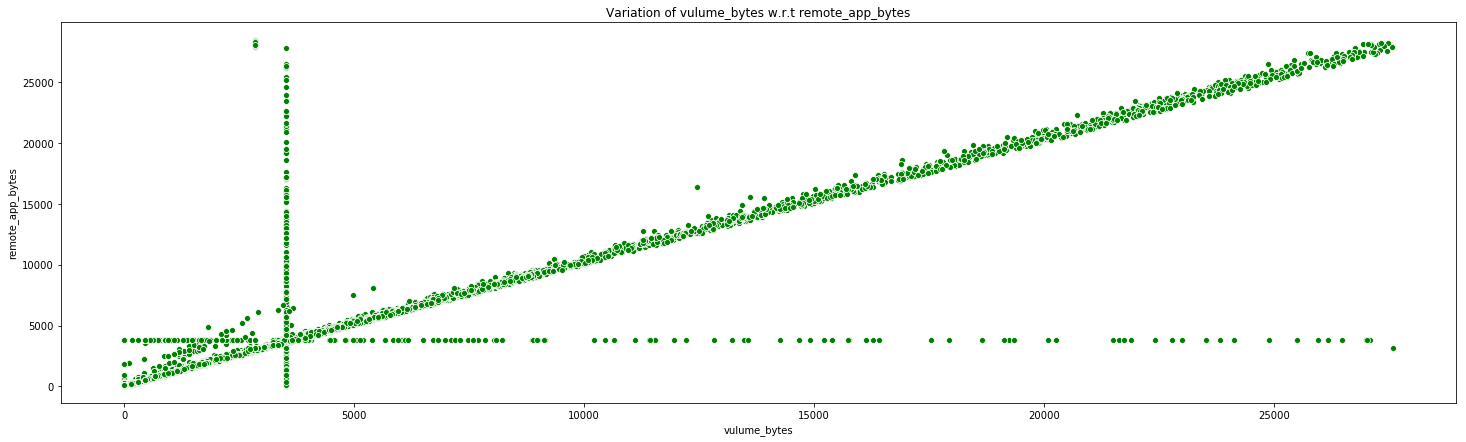

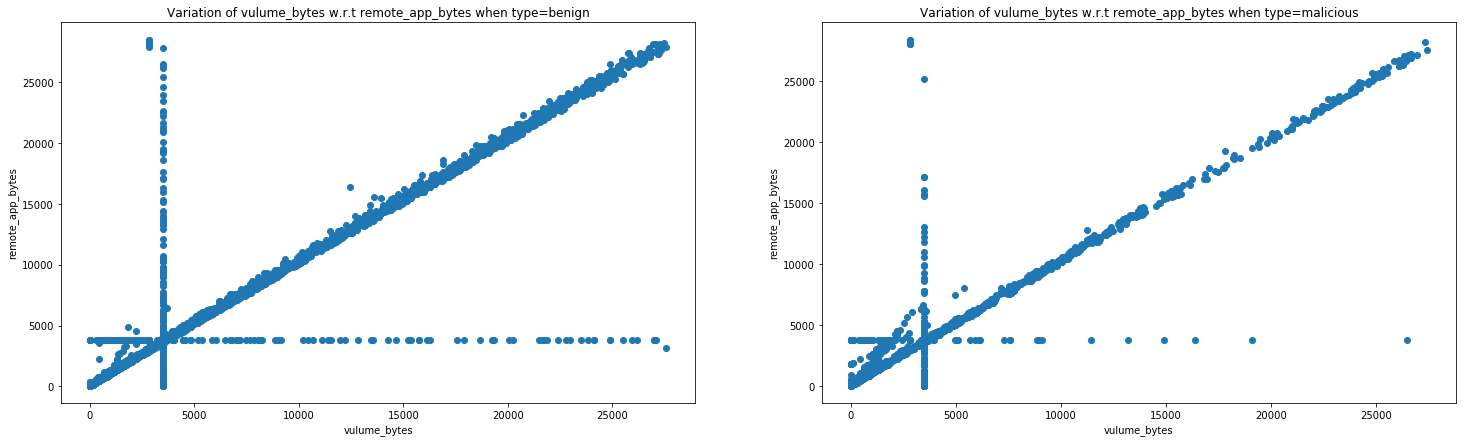

In [43]:
bivariate('vulume_bytes','remote_app_bytes')

#### INFERENCE: Just like tcp_packets and source_app_packets, volume of bytes sent from the device to external sites and and amount of bytes recieved back from external devices seem to have a strong linear relationship. Both benign and malicious datapoints have similiar plots and as others until the point, some datapoints independent of x and y value are seen.

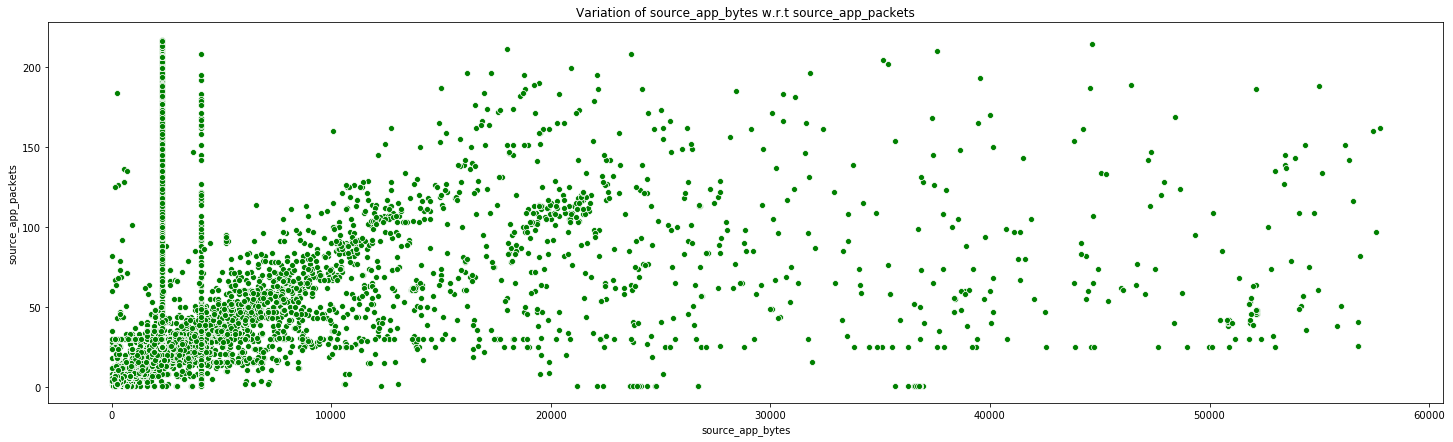

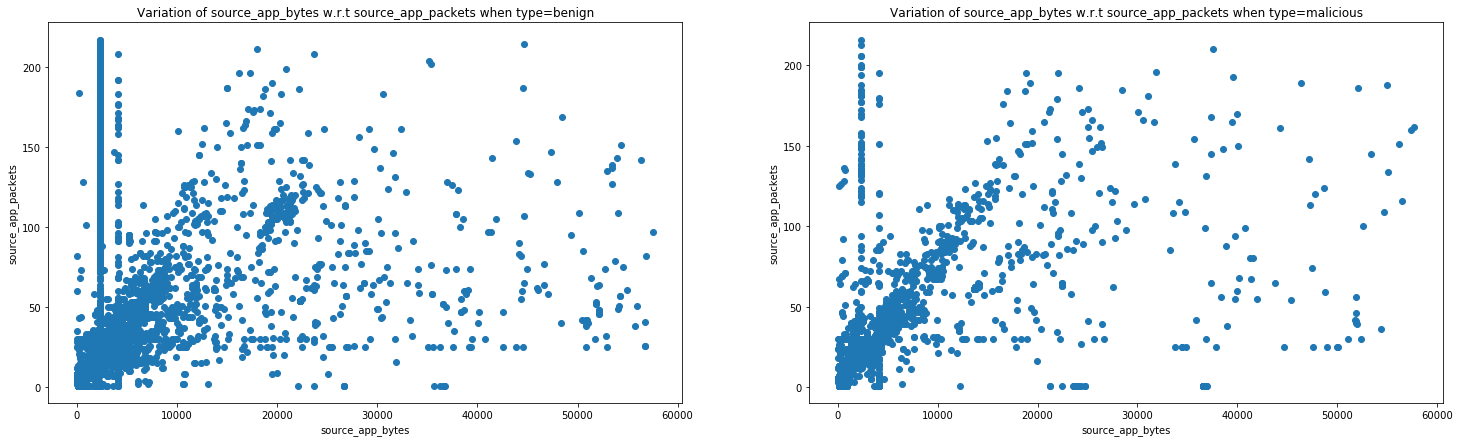

In [135]:
bivariate('source_app_bytes','source_app_packets')

#### INFERENCE: Eventhough common-sense suggests that the number of data packets and bytes moving from the device to external devices should have a strong positve linear relationship, the plots suggests otherwise. Most of the datapoints are scattered except the ones with lesser magnitudes. Benign and malicious datapoints are also indistinguishable.

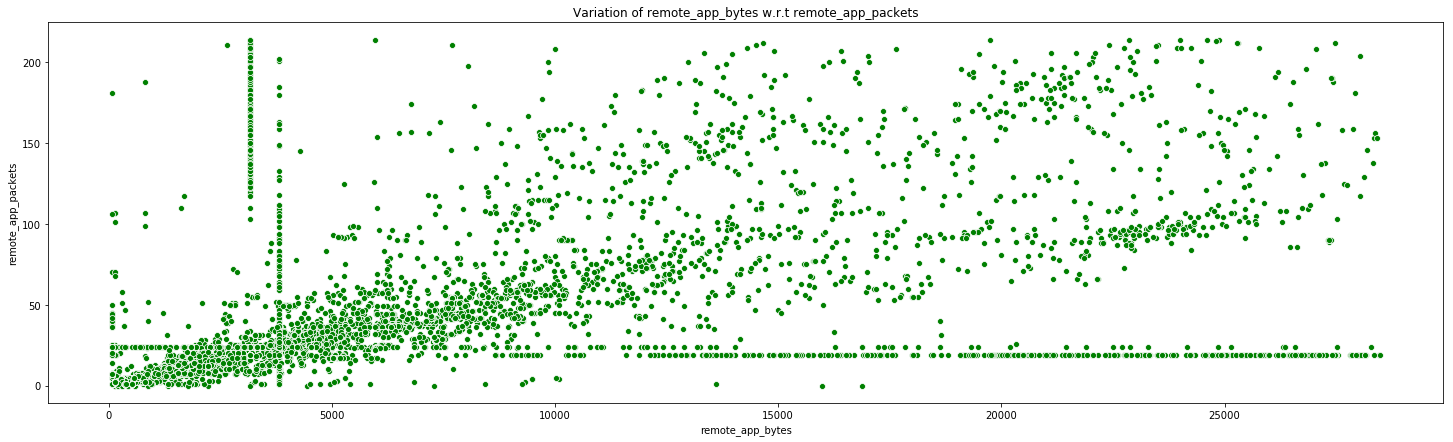

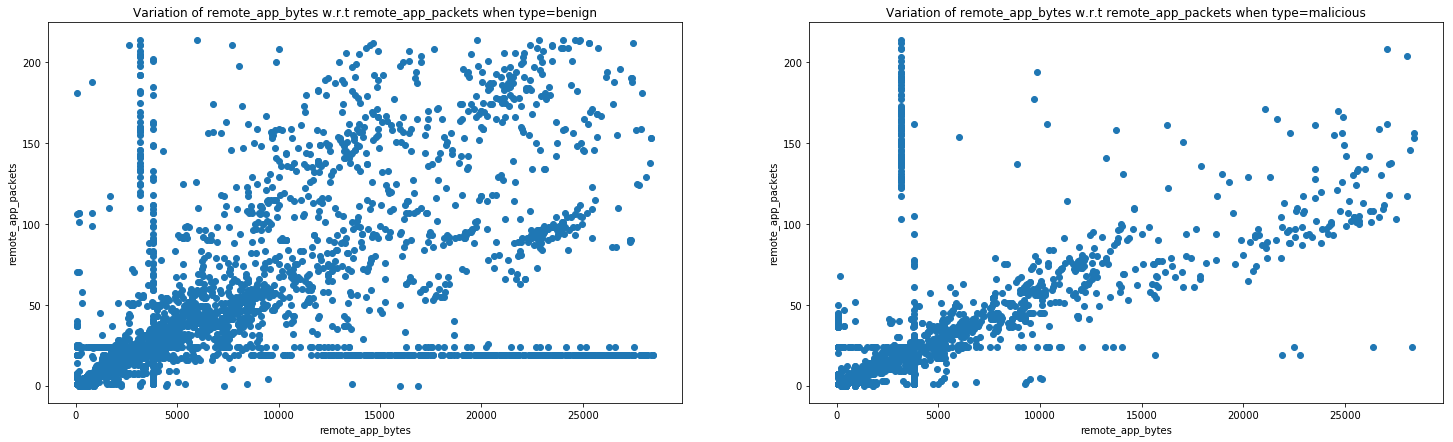

In [137]:
bivariate('remote_app_bytes','remote_app_packets')

#### INFERENCE: Just like source_app_bytes and source_app_packets, most of the datapoints are scattered except the ones with lesser magnitudes. However one might argue about the linearity seen for smaller values of x and y. Also malicious data points are much better w.r.t. to be consitent datapoints which might lie on a same straight line when compared to benign data points.

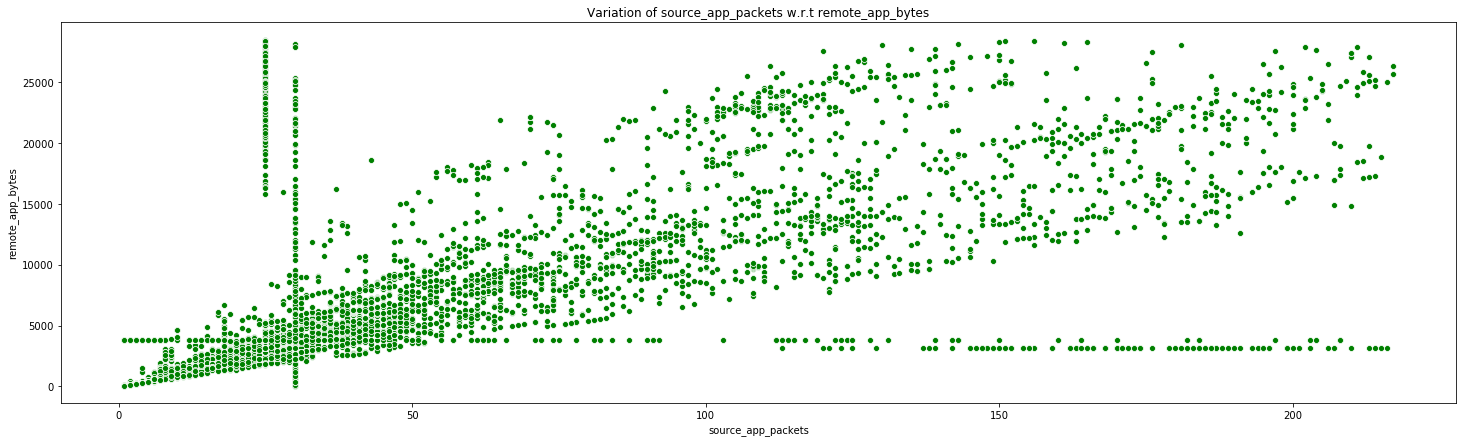

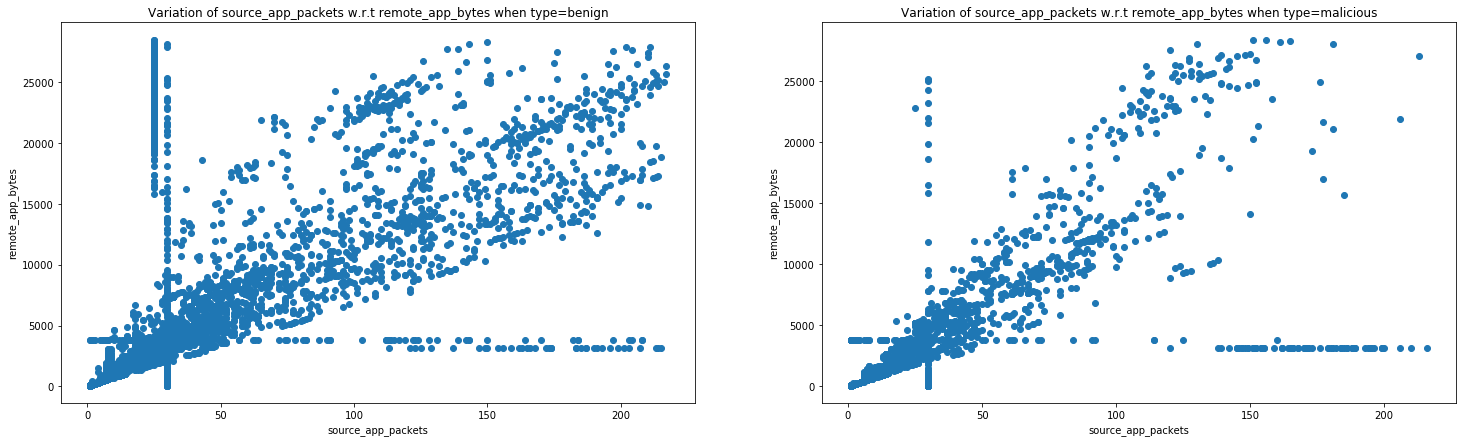

In [136]:
bivariate('source_app_packets','remote_app_bytes')

#### INFERENCE: The number of bytes going out and coming in the android device and remote application showcase strong positive correlation. Both benign and malicious dataplots exhibit this property. As discussed in many cases above, some datapoints are independent of x or y values. Other then that, these 2 features go hand-in-hand with each other!

<Figure size 1800x504 with 0 Axes>

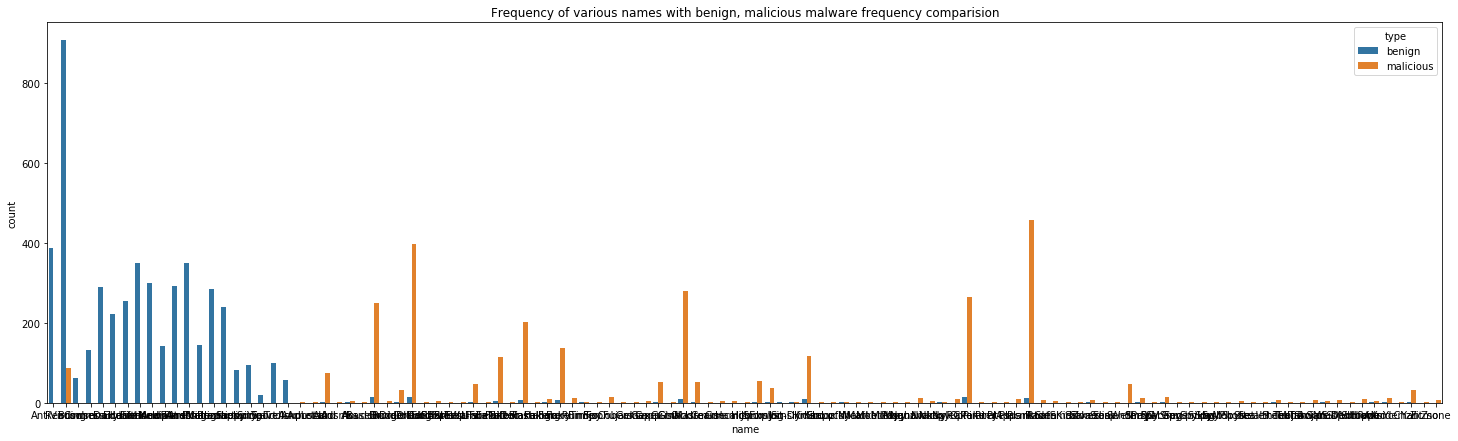

<Figure size 1800x504 with 0 Axes>

In [61]:
sns.countplot(x=df['name'],data=df,hue="type")
plt.title("Frequency of various names with benign, malicious malware frequency comparision")
plt.figure()

<Figure size 1800x504 with 0 Axes>

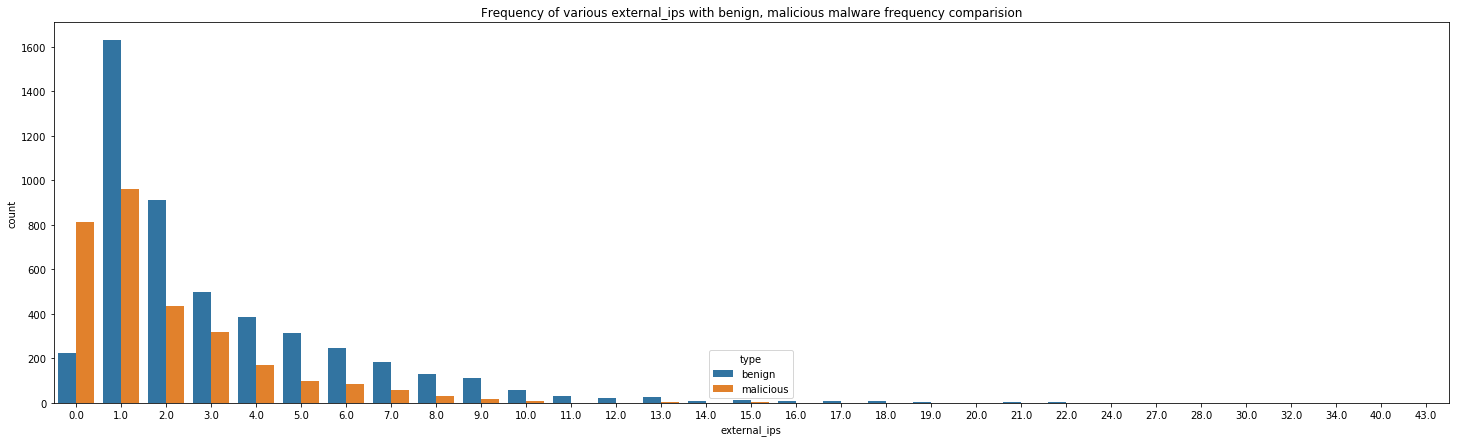

<Figure size 1800x504 with 0 Axes>

In [246]:
sns.countplot(x=df['external_ips'],data=df,hue="type")
plt.title("Frequency of various external_ips with benign, malicious malware frequency comparision")
plt.figure()

<Figure size 1800x504 with 0 Axes>

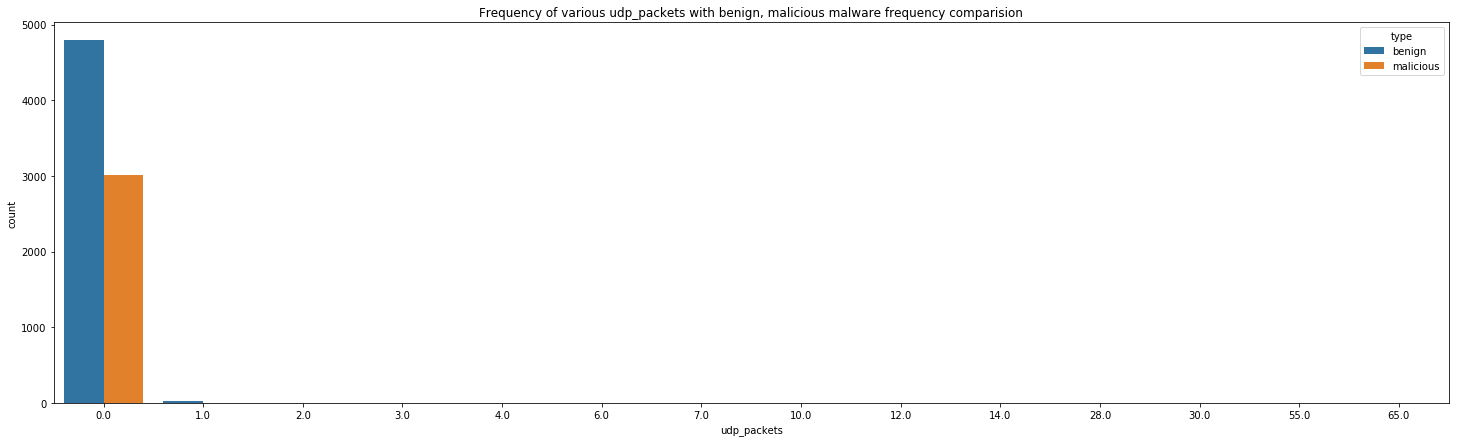

<Figure size 1800x504 with 0 Axes>

In [247]:
sns.countplot(x=df['udp_packets'],data=df,hue="type")
plt.title("Frequency of various udp_packets with benign, malicious malware frequency comparision")
plt.figure()

#### Applications are found malicious when no. of UDP pakects is more than 0.

<Figure size 1800x504 with 0 Axes>

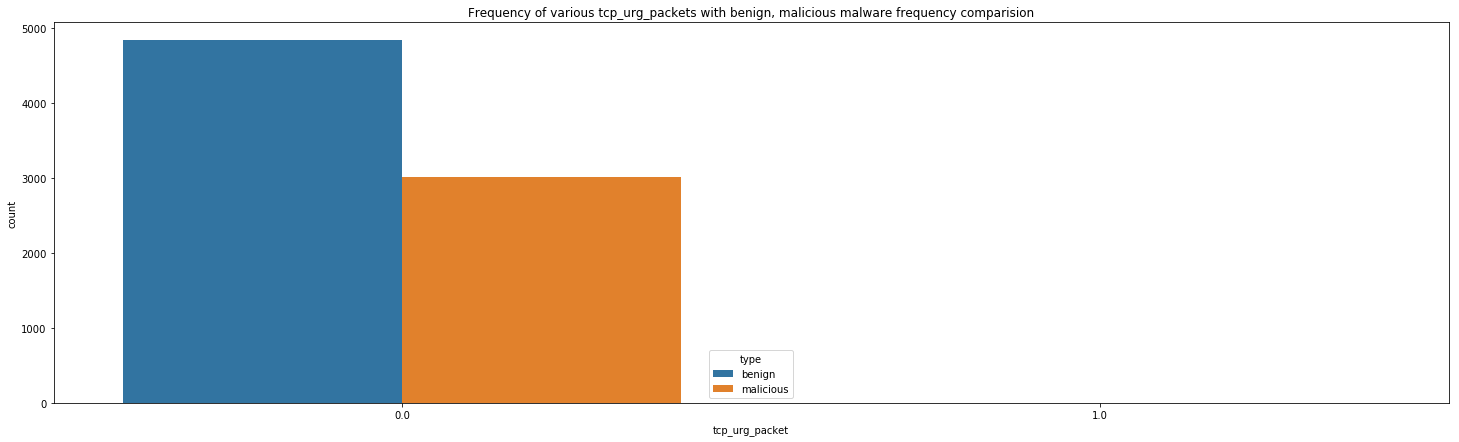

<Figure size 1800x504 with 0 Axes>

In [248]:
sns.countplot(x=df['tcp_urg_packet'],data=df,hue="type")
plt.title("Frequency of various tcp_urg_packets with benign, malicious malware frequency comparision")
plt.figure()

#### Applications are found malicious when no. of tcp_urg_pakects is more than 0.

<Figure size 1800x504 with 0 Axes>

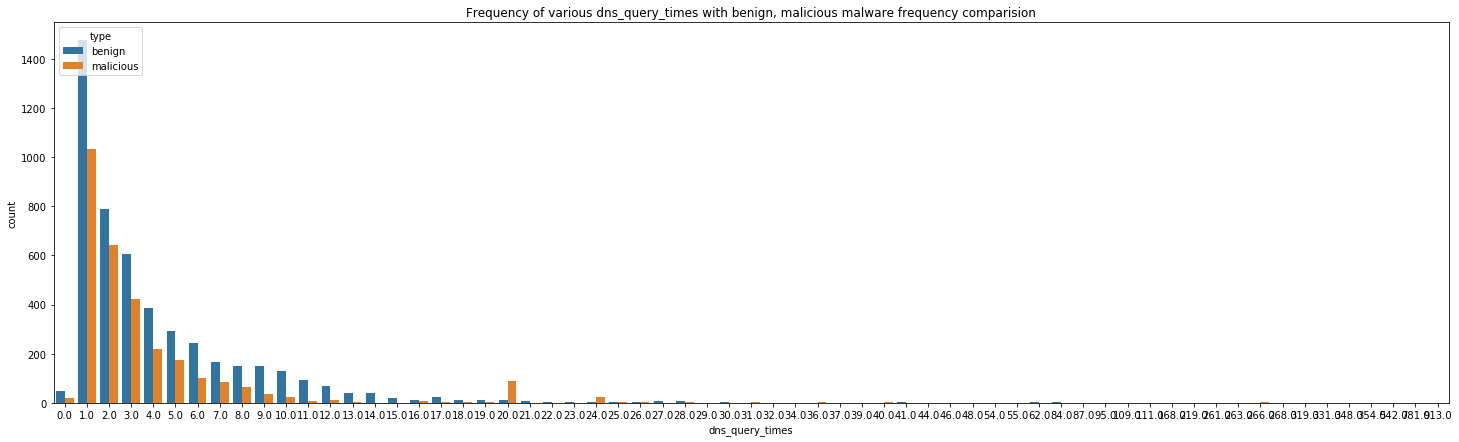

<Figure size 1800x504 with 0 Axes>

In [249]:
sns.countplot(x=df['dns_query_times'],data=df,hue="type")
plt.title("Frequency of various dns_query_times with benign, malicious malware frequency comparision")
plt.figure()

## Multivariate Analysis:

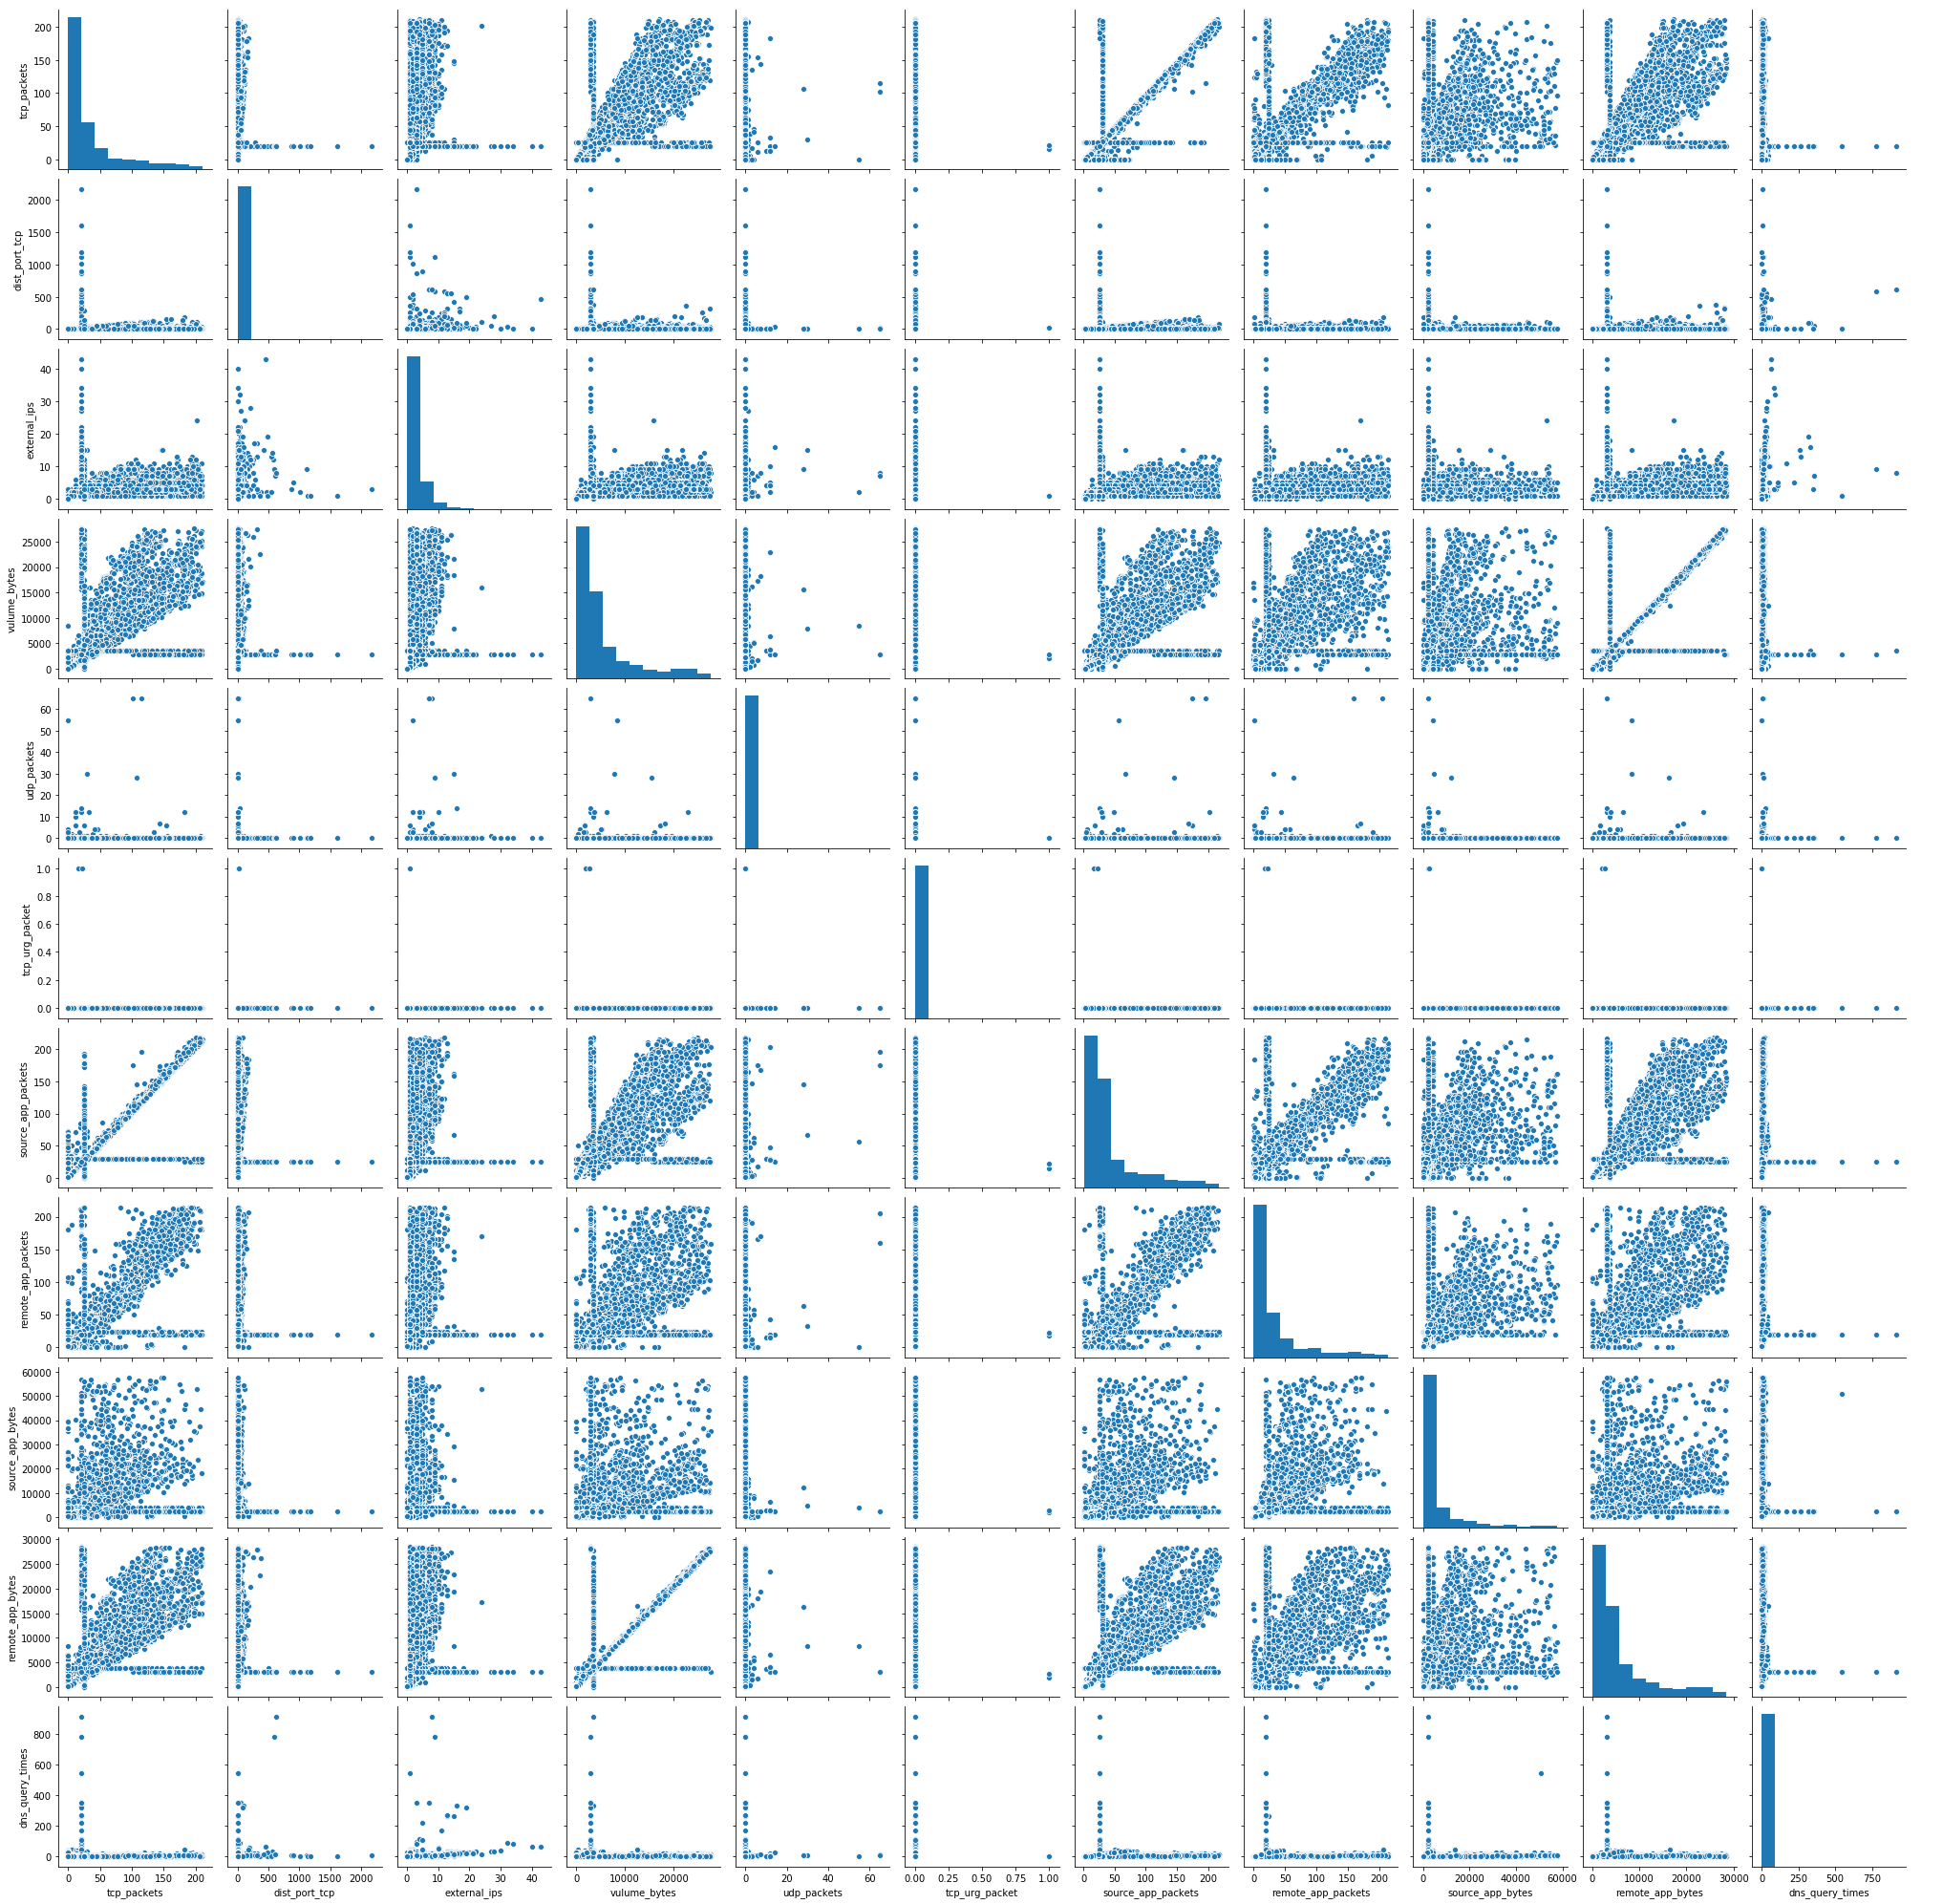

In [115]:
sns.pairplot(df)

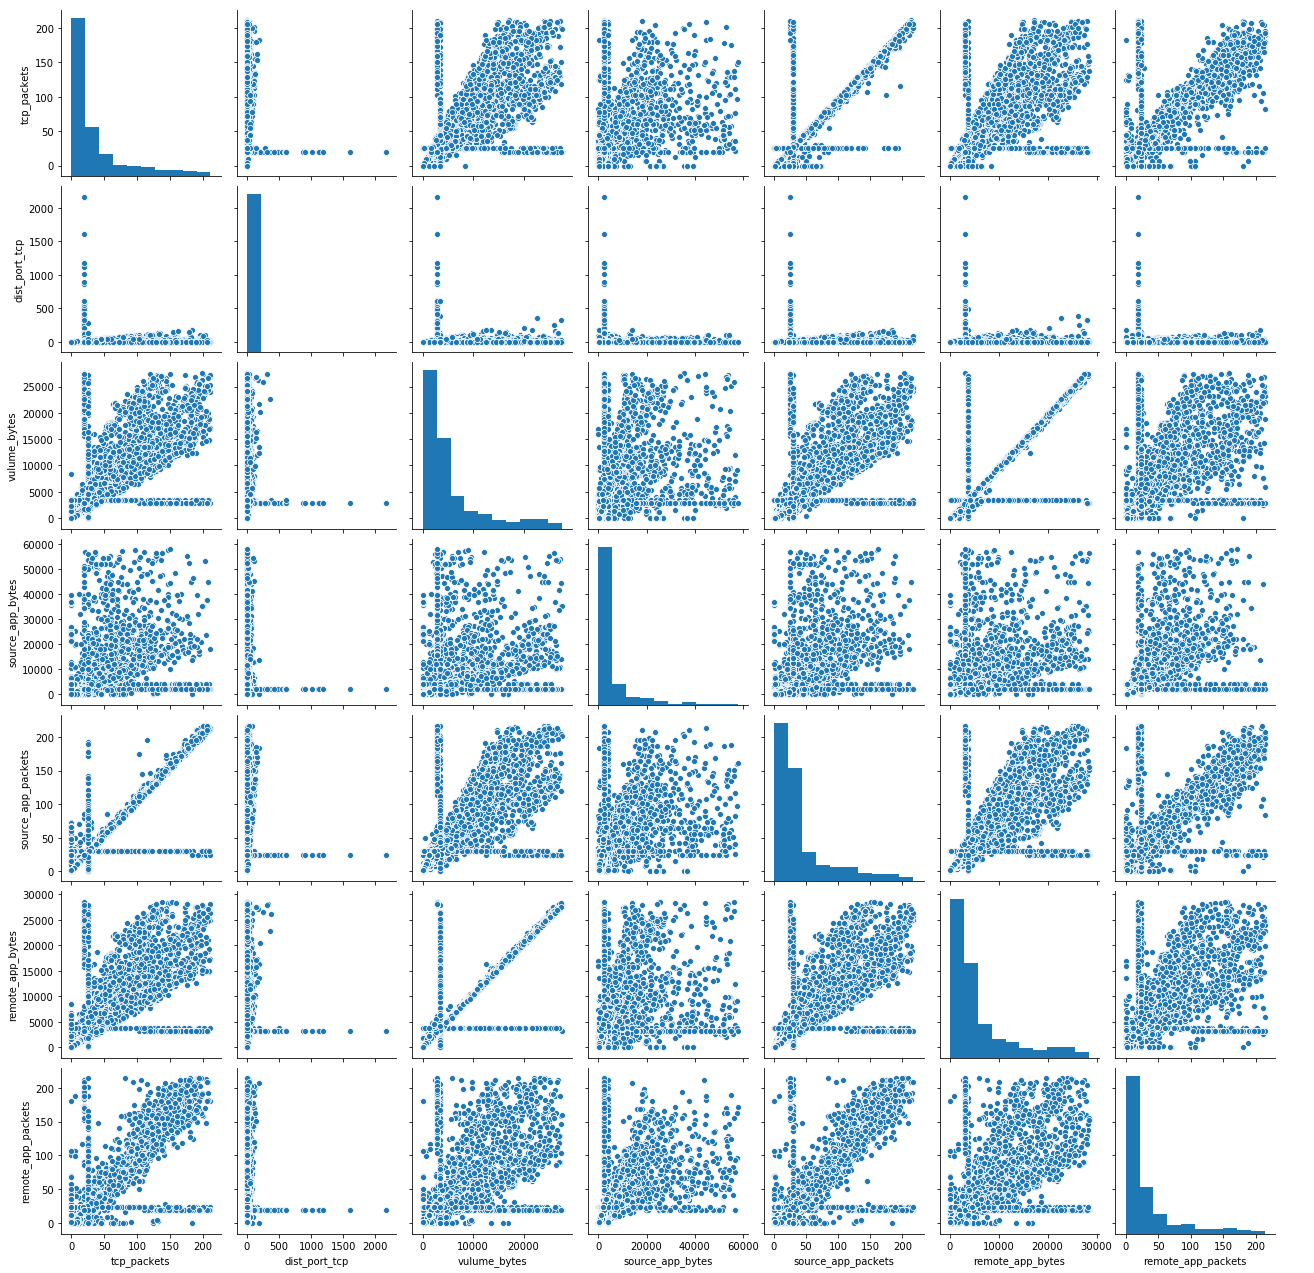

In [116]:
sns.pairplot(df[continious_cols])

## Correlation analysis:

In [127]:
df[continious_cols].corr()

tcp_packets  dist_port_tcp  vulume_bytes  \
tcp_packets            1.000000       0.019729      0.704855   
dist_port_tcp          0.019729       1.000000      0.023398   
vulume_bytes           0.704855       0.023398      1.000000   
source_app_bytes       0.303321      -0.006172      0.285758   
source_app_packets     0.941523       0.022084      0.699489   
remote_app_bytes       0.706872       0.029429      0.940971   
remote_app_packets     0.759641       0.008802      0.607619   

                    source_app_bytes  source_app_packets  remote_app_bytes  \
tcp_packets                 0.303321            0.941523          0.706872   
dist_port_tcp              -0.006172            0.022084          0.029429   
vulume_bytes                0.285758            0.699489          0.940971   
source_app_bytes            1.000000            0.309045          0.285557   
source_app_packets          0.309045            1.000000          0.706157   
remote_app_bytes            0.285557            0.706157          1.000000   
remote_app_packets          0.360760            0.769288          0.620074   

                    remote_app_packets  
tcp_packets                   0.759641  
dist_port_tcp                 0.008802  
vulume_bytes                  0.607619  
source_app_bytes              0.360760  
source_app_packets            0.769288  
remote_app_bytes              0.620074  
remote_app_packets            1.000000

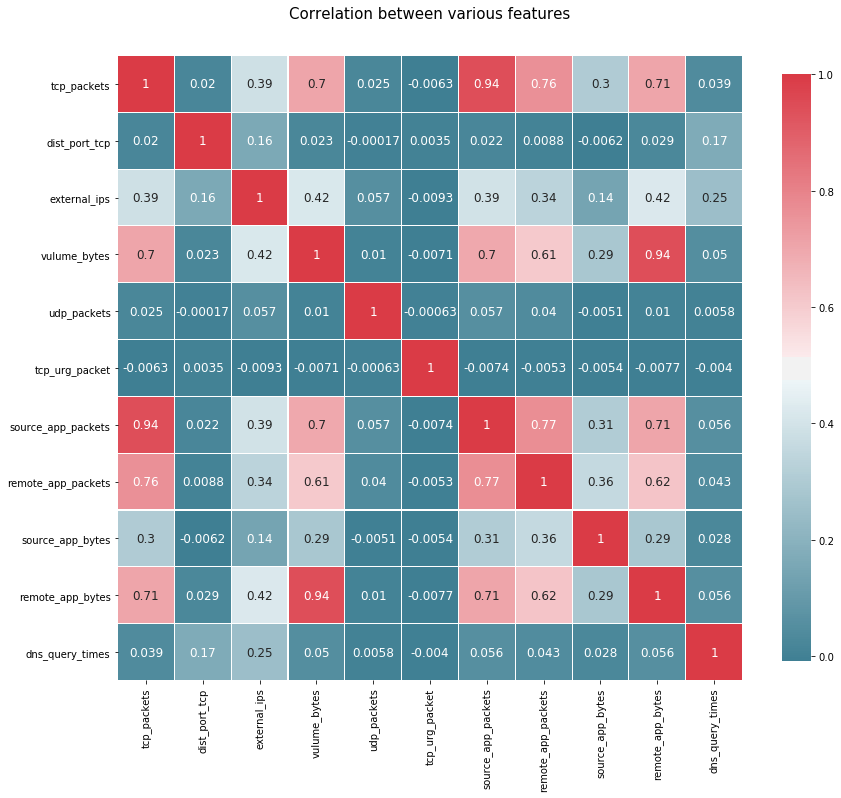

In [119]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220,10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Correlation between various features', y=1.05, size=15)

correlation_heatmap(df)

## NORMALIZATION AND STANDARDIZATION:

In [120]:
summary_df = df[continious_cols].describe()

In [121]:
# Normalize continious data
df_norm = df.copy()
    
for cols in continious_cols:
    df_norm[cols] = (df_norm[cols] - df_norm[cols].min())/(df_norm[cols].max() - df_norm[cols].min())
    
df_norm.describe()

tcp_packets  dist_port_tcp  external_ips  vulume_bytes  udp_packets  \
count  7845.000000    7845.000000   7845.000000   7845.000000  7845.000000   
mean      0.176280       0.003497      2.687062      0.190642     0.055067   
std       0.219814       0.023817      2.900938      0.232849     1.392329   
min       0.000000       0.000000      0.000000      0.000000     0.000000   
25%       0.028436       0.000000      1.000000      0.032274     0.000000   
50%       0.094787       0.000000      2.000000      0.102789     0.000000   
75%       0.213270       0.000000      4.000000      0.252937     0.000000   
max       1.000000       1.000000     43.000000      1.000000    65.000000   

       tcp_urg_packet  source_app_packets  remote_app_packets  \
count     7845.000000         7845.000000         7845.000000   
mean         0.000255            0.183907            0.162131   
std          0.015966            0.216450            0.206359   
min          0.000000            0.000000            0.000000   
25%          0.000000            0.027778            0.032710   
50%          0.000000            0.111111            0.088785   
75%          0.000000            0.222222            0.186916   
max          1.000000            1.000000            1.000000   

       source_app_bytes  remote_app_bytes  dns_query_times  
count       7845.000000       7845.000000      7845.000000  
mean           0.094199          0.194361         4.786743  
std            0.153520          0.232469        18.892886  
min            0.000000          0.000000         0.000000  
25%            0.017332          0.034954         1.000000  
50%            0.039356          0.109050         2.000000  
75%            0.087923          0.255940         5.000000  
max            1.000000          1.000000       913.000000

In [122]:
# Standardize continious data
df_std = df.copy()
    
for cols in continious_cols:
    df_std[cols] = (df_std[cols] - df_std[cols].mean())/(df_std[cols].std())
    
df_std.describe()

tcp_packets  dist_port_tcp  external_ips  vulume_bytes  udp_packets  \
count  7.845000e+03   7.845000e+03   7845.000000  7.845000e+03  7845.000000   
mean   1.003659e-16  -4.010601e-16      2.687062 -1.401329e-16     0.055067   
std    1.000000e+00   1.000000e+00      2.900938  1.000000e+00     1.392329   
min   -8.019535e-01  -1.468351e-01      0.000000 -8.187388e-01     0.000000   
25%   -6.725893e-01  -1.468351e-01      1.000000 -6.801320e-01     0.000000   
50%   -3.707396e-01  -1.468351e-01      2.000000 -3.772995e-01     0.000000   
75%    1.682779e-01  -1.468351e-01      4.000000  2.675336e-01     0.000000   
max    3.747354e+00   4.184020e+01     43.000000  3.475892e+00    65.000000   

       tcp_urg_packet  source_app_packets  remote_app_packets  \
count     7845.000000        7.845000e+03        7.845000e+03   
mean         0.000255       -4.917248e-16        1.018235e-15   
std          0.015966        1.000000e+00        1.000000e+00   
min          0.000000       -8.496519e-01       -7.856748e-01   
25%          0.000000       -7.213183e-01       -6.271630e-01   
50%          0.000000       -3.363175e-01       -3.554284e-01   
75%          0.000000        1.770170e-01        1.201070e-01   
max          1.000000        3.770358e+00        4.060258e+00   

       source_app_bytes  remote_app_bytes  dns_query_times  
count      7.845000e+03      7.845000e+03      7845.000000  
mean       5.109007e-16     -1.112657e-15         4.786743  
std        1.000000e+00      1.000000e+00        18.892886  
min       -6.135960e-01     -8.360734e-01         0.000000  
25%       -5.006999e-01     -6.857145e-01         1.000000  
50%       -3.572394e-01     -3.669778e-01         2.000000  
75%       -4.088209e-02      2.648930e-01         5.000000  
max        5.900207e+00      3.465585e+00       913.000000

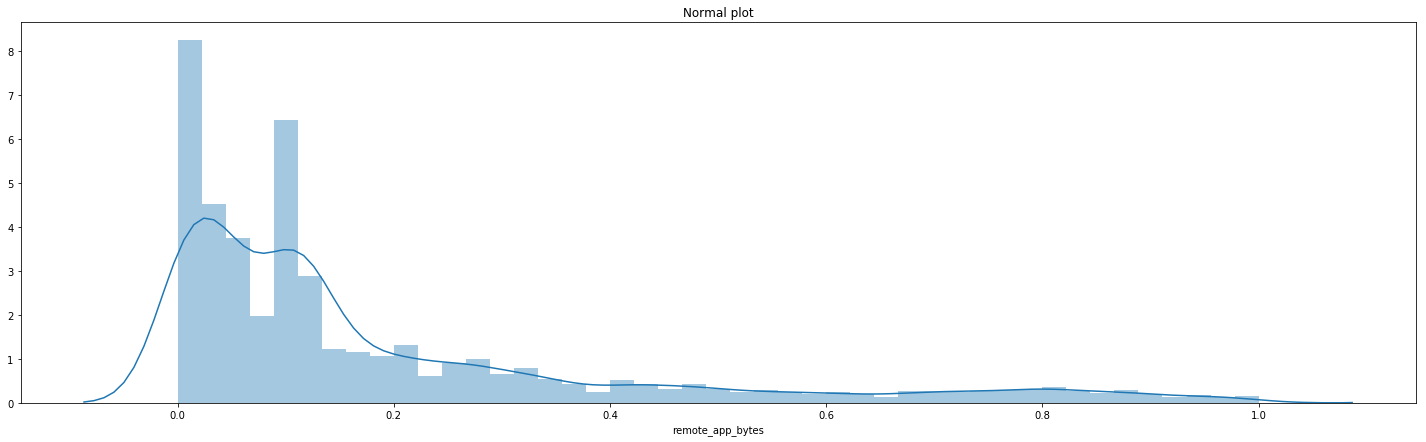

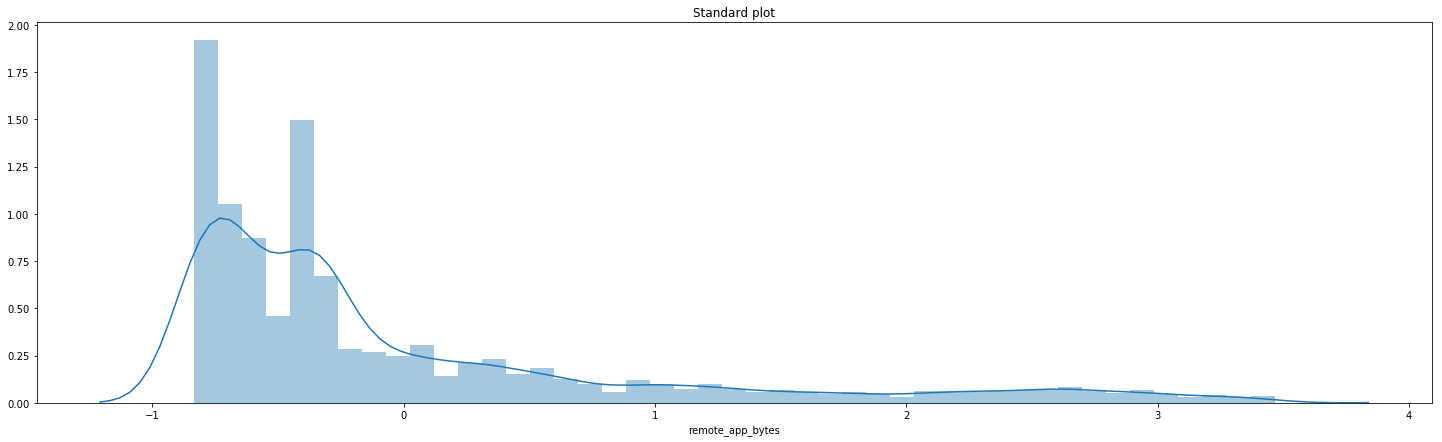

In [123]:
# plots to prove normality

sns.distplot(df_norm['remote_app_bytes'],kde=True)
plt.title("Normal plot")
plt.figure()
plt.title("Standard plot")
sns.distplot(df_std['remote_app_bytes'],kde=True)

#### INFERENCES:
#### 1.Note that the domain of first plot is [0,1], hence the data is normalized
#### 2.Also the domain of second plot will have mean 0 and standard deviation 1, hence it is standardized.

In [124]:
#df[df['type']=='benign']

In [125]:
#df[df['remote_app_bytes']>=6500]['type'].value_counts()

## Hypothesis testing


#### <i>NULL HYPOTHESIS(H<sub>0</sub>):</i>
#### For an andriod malware to be benign, the mean value(µ) of bytes from the remote application, or the volume (in bytes) of data from server up to the emulator of the device must be less than or same as 6500.

#### <i>ALTERNATE HYPOTHESIS(H<sub>a</sub>):</i>
#### For an andriod malware to be benign, the mean value(µ) of bytes from the remote application, or the volume (in bytes) of data from server up to the emulator of the device must be more than 6500.

In [126]:
# As our sample size is large enough(>30) and approximately normal, we can proceed with z-Tests

ztest ,pval = stests.ztest(df[df['type']=='benign']['remote_app_bytes'], alternative ="larger", value=6500) 
# alternative = larger indicates one tailed test. larger indicates µ>6500 in alternate hypothesis
print("p = ",float(pval))
if pval < 0.05:
    print("Reject Null hypothesis")
else:
    print("Accept Null hypothesis")

p =  0.09063126533155175
Accept Null hypothesis


#### INFERENCE: There is a strong evidence that population mean of number of bytes transferred from alien devices to an andriod device causing a malware is less than or same as 6500 when it is only benign and not malicious. Not only that, from other analysis we also had seen that some features like source app bytes and some others share a positive linear relationship with remote app bytes. Hence maximum damage can be avoided by keeping the data traffic under some clever limits regardless of type of android device, extra security layers, extent of use, type of remote device etc.

In [44]:
df.describe()

tcp_packets  dist_port_tcp  external_ips  vulume_bytes  udp_packets  \
count  7845.000000    7845.000000   7845.000000   7845.000000  7845.000000   
mean     37.195156       7.578330      2.687062   5257.155577     0.055067   
std      46.380689      51.611164      2.900938   6421.041142     1.392329   
min       0.000000       0.000000      0.000000      0.000000     0.000000   
25%       6.000000       0.000000      1.000000    890.000000     0.000000   
50%      20.000000       0.000000      2.000000   2834.500000     0.000000   
75%      45.000000       0.000000      4.000000   6975.000000     0.000000   
max     211.000000    2167.000000     43.000000  27576.000000    65.000000   

       tcp_urg_packet  source_app_packets  remote_app_packets  \
count     7845.000000         7845.000000         7845.000000   
mean         0.000255           40.723901           34.695985   
std          0.015966           46.753146           44.160744   
min          0.000000            1.000000            0.000000   
25%          0.000000            7.000000            7.000000   
50%          0.000000           25.000000           19.000000   
75%          0.000000           49.000000           40.000000   
max          1.000000          217.000000          214.000000   

       source_app_bytes  remote_app_bytes  source_app_packets.1  \
count       7845.000000       7845.000000           7845.000000   
mean        5440.483365       5590.594009             41.744168   
std         8866.556179       6604.197829             48.399045   
min            0.000000         69.000000              1.000000   
25%         1001.000000       1062.000000              7.000000   
50%         2273.000000       3167.000000             25.000000   
75%         5078.000000       7340.000000             50.000000   
max        57755.000000      28478.000000            224.000000   

       dns_query_times  
count      7845.000000  
mean          4.786743  
std          18.892886  
min           0.000000  
25%           1.000000  
50%           2.000000  
75%           5.000000  
max         913.000000